# **Investing for Stocks (Buy-and-Hold versus Momentum trading using MPT)** 


Final Project Video: https://drive.google.com/drive/folders/1G98FXmLlHdMGrq2CxjmHRR5AoDQK6qAy?usp=share_link 
### **Problem Statement**

In this project, the objective is to create a portfolio of stocks that appropriately balances the conflicting risk and profit and compare different investment strategies. 

* Cleaned Data and performed Exploratory Data Analysis
* Peformed MPT, where our goal is to allocate money into stocks to maximize the expected return while accounting risk tolerance, with added constraints
* Performed MT on selected portfolio (from MPT) to identify the best strategy for each stock based on the crossing points of the moving average.
* Analysis on how our portfolio performed for 100K investment using different strategies.



**SECTORS:**
* Financials Sector	
* Materials Sector	
* Consumer Discretionary Sector


**STOCKS CHOSEN:**

* Financial Sector (GS, JPM, SCHW)
* Materials Sector (LYB, DD, MOS)
* Consumer Discretionary Sector (CMG, DPZ, AMZN)


![picture](https://img.freepik.com/premium-photo/stock-market-forex-trading-graph-graphic-concept_73426-180.jpg?w=2000)

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
# Importing modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
from pylab import *
from datetime import datetime
import pandas_datareader as pdr

In [ ]:
# Import stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
     |████████████████████████████████| 106 kB 15.1 MB/s 
     |████████████████████████████████| 127 kB 45.8 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=d6c59ab09edaf871064807309d08cc4900decd12775035484db076712340e0f1
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=b9f38b077c837e1269530afca0b972b1b2e31e203047844e45b262fea32af95f
  Stored in directory: /root/.cache/pip/wheels/83/63/2f/117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built parse sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Morden Portfolio Theory**

## **Extract stock price from Yahoo**

In [ ]:
# Assign the tickers list
tickers_list = ['CMG','DPZ','AMZN','GS','JPM','SCHW','LYB','DD','MOS']

# pull historical day wise price data for each stocks between 1st January 2017 to 31st december 2021
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

In [ ]:
dow_prices

{'CMG':                    open         high          low        close     adjclose  \
 2017-01-03   379.109985   380.380005   374.079987   374.769989   374.769989   
 2017-01-04   374.910004   383.899994   372.869995   381.859985   381.859985   
 2017-01-05   382.619995   392.670013   379.049988   391.890015   391.890015   
 2017-01-06   391.500000   399.799988   390.359985   398.440002   398.440002   
 2017-01-09   398.700012   399.250000   392.109985   395.059998   395.059998   
 ...                 ...          ...          ...          ...          ...   
 2021-12-23  1749.300049  1756.750000  1732.760010  1748.670044  1748.670044   
 2021-12-27  1748.000000  1771.349976  1748.000000  1766.239990  1766.239990   
 2021-12-28  1768.000000  1776.670044  1747.010010  1752.910034  1752.910034   
 2021-12-29  1739.449951  1761.800049  1739.449951  1748.599976  1748.599976   
 2021-12-30  1740.079956  1763.619995  1740.079956  1747.219971  1747.219971   
 
              volume ticker  
 

In [ ]:
# let's extract just the data we need (adj close)
prep_data = pd.DataFrame()
# combine all the tickers (adj close prices)
for i in tickers_list:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

In [ ]:
prep_data.shape # check the shape

(1258, 9)

In [ ]:
prep_data.head() # see table

,CMG,DPZ,AMZN,GS,JPM,SCHW,LYB,DD,MOS
2017-01-03,374.769989,150.084274,37.683498,215.575577,73.776649,37.391666,62.982933,72.189369,27.640739
2017-01-04,381.859985,154.472336,37.859001,216.967682,73.912735,38.340416,64.367599,72.765869,28.838839
2017-01-05,391.890015,154.263840,39.022499,215.352448,73.232368,38.107880,64.287849,72.440025,28.895002
2017-01-06,398.440002,154.946198,39.799500,218.547195,73.240883,38.349701,63.918129,71.988838,28.829483
2017-01-09,395.059998,155.912872,39.846001,216.753494,73.291901,38.247398,62.990215,72.427483,28.745243


## **Check missing values**

In [ ]:
prep_data.isnull().sum() # No missing values

CMG     0
DPZ     0
AMZN    0
GS      0
JPM     0
SCHW    0
LYB     0
DD      0
MOS     0
dtype: int64

## **Visualize the return (pct_change) for all stocks**

In [ ]:
# create return features for each ticker, we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,CMG,DPZ,AMZN,GS,JPM,SCHW,LYB,DD,MOS
2017-01-04,0.018918,0.029237,0.004657,0.006458,0.001845,0.025373,0.021985,0.007986,0.043345
2017-01-05,0.026266,-0.001350,0.030732,-0.007445,-0.009205,-0.006065,-0.001239,-0.004478,0.001948
2017-01-06,0.016714,0.004423,0.019912,0.014835,0.000116,0.006346,-0.005751,-0.006228,-0.002267
2017-01-09,-0.008483,0.006239,0.001168,-0.008207,0.000697,-0.002668,-0.014517,0.006093,-0.002922
2017-01-10,0.049157,0.011246,-0.001280,-0.001317,0.002901,0.001702,-0.000116,-0.002077,0.000325
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.002298,0.020586,0.000184,0.007088,0.003574,0.008888,0.028743,0.020000,0.011880
2021-12-27,0.010048,0.020830,-0.008178,0.007791,0.005723,0.008105,0.012369,0.016170,0.020929
2021-12-28,-0.007547,0.001005,0.005844,-0.001108,0.003035,-0.003729,0.011454,0.008019,-0.003500
2021-12-29,-0.002459,0.008301,-0.008555,-0.003637,-0.000504,-0.006316,-0.000539,0.001740,0.002509


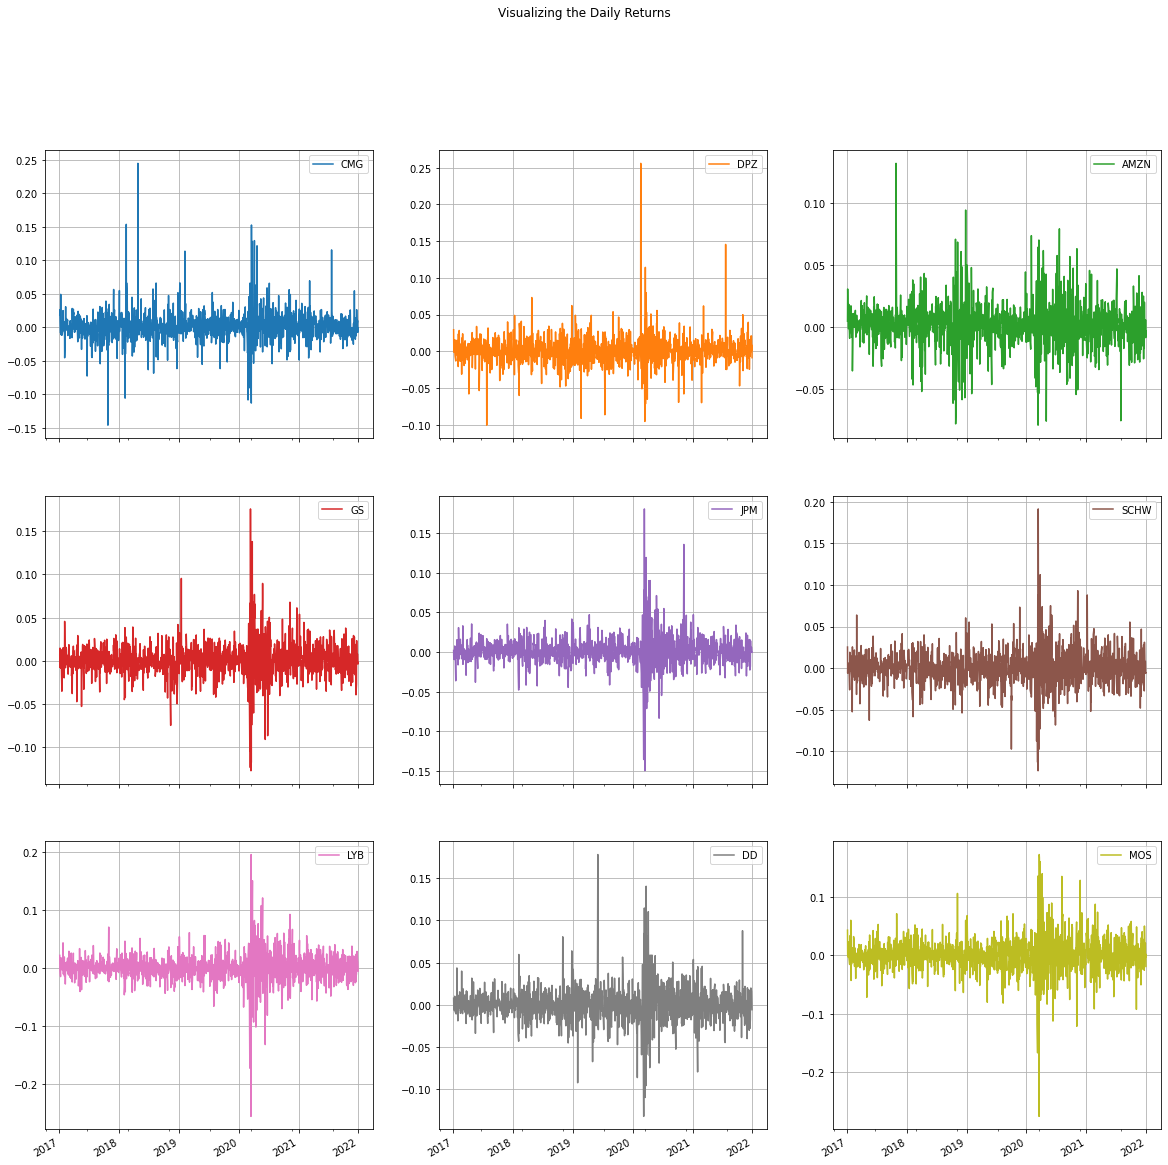

In [ ]:
# Visualizing the daily return
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,3),
         figsize=(20,20),title='Visualizing the Daily Returns')

plt.show()



**Most stocks have daily return centered around 0%, however stocks such as CMG and DPZ (Chipotle and Dominoes) have higher volatility when compared with stocks such as AMZN and DD (Amazon and Dupont). In general all stocks have increased volatility during the Q1 and Q2 period of 2020.**

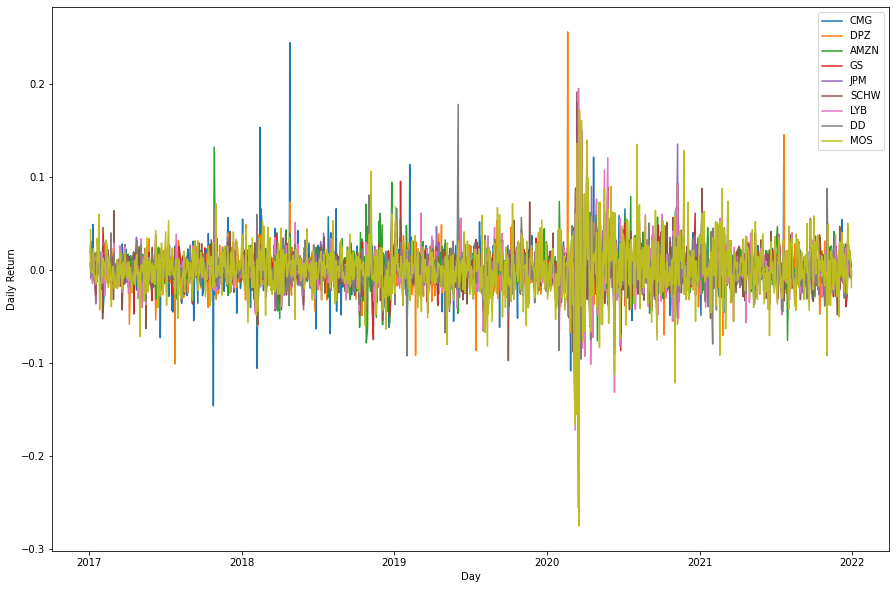

In [ ]:
# Overlapping return values of all stocks
fig = plt.figure(figsize=(15,10))
plt.plot(return_data)
plt.xlabel('Day')
plt.ylabel('Daily Return')
plt.legend(['CMG','DPZ','AMZN','GS','JPM','SCHW','LYB','DD','MOS'])
plt.show()

## **Visualize the closing price for three stocks (one stock per sector)**

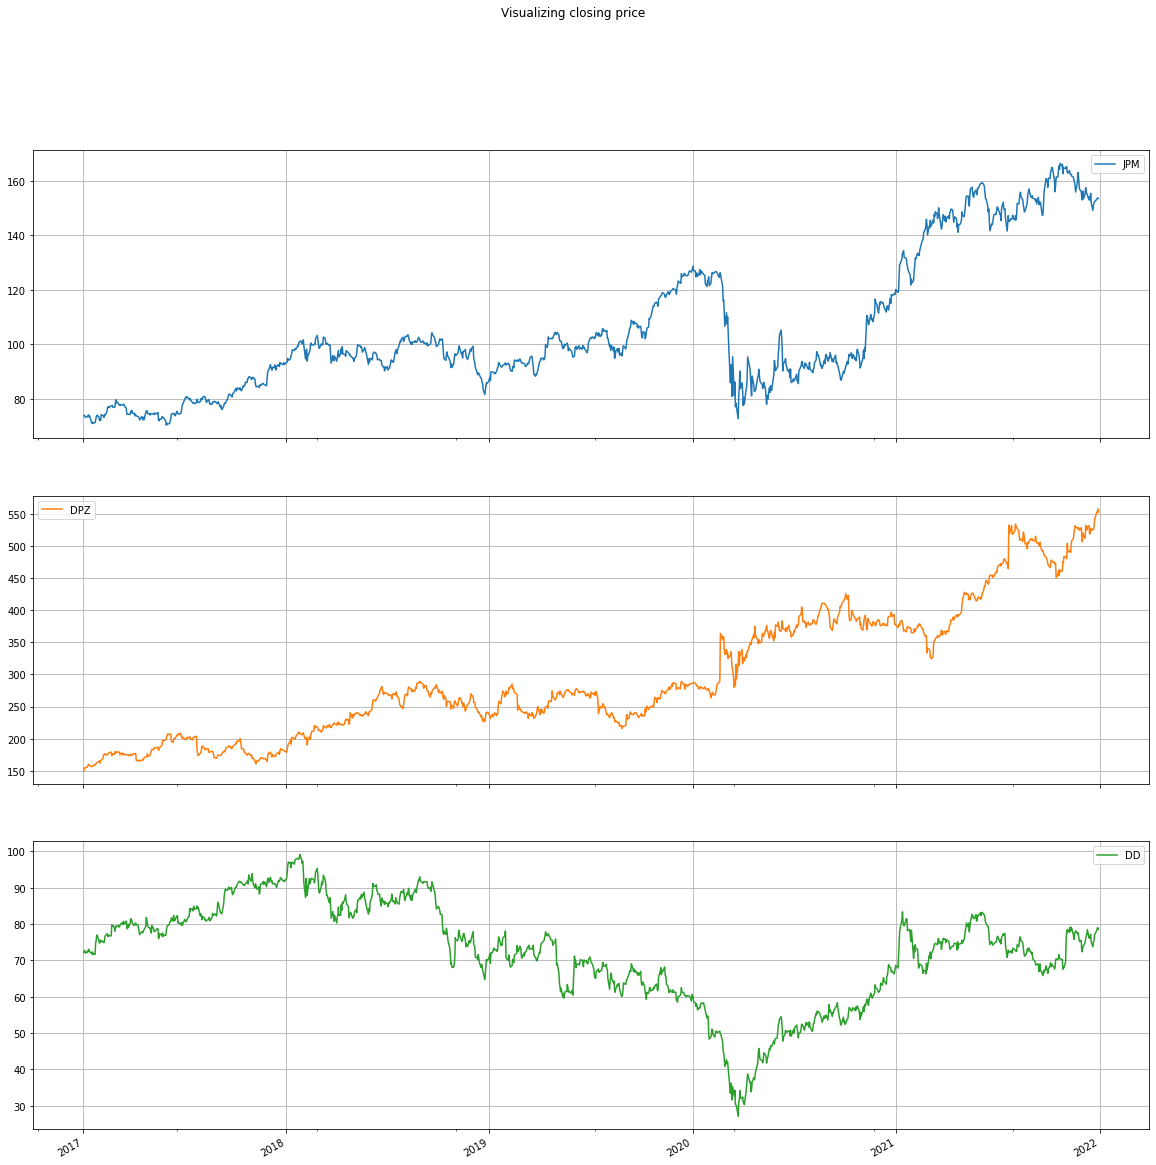

In [ ]:
vis_prep_data = prep_data[['JPM','DPZ','DD']]
# Visualizing the closing price
vis_prep_data.plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(20,20),title='Visualizing closing price')

plt.show()


**Above we can see that DPZ (Dominoes Pizza) showed more resistance to Covid-19 led disruptions as compared to JPM and DD. Returns for DD have been flat for the past 5 years and some of this can be attributed to nature of business that DuPont operates in. The increasing ESG focus and commodity business has put pressure on profit margins leading to poor returns.**

## **Average return and Std return**

In [ ]:
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"]) # Computing avg returns of the stocks
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"]) # Computing deviation of the stocks
print(Std_Dev_Return) 

      Avg_Return
CMG     0.001491
DPZ     0.001222
AMZN    0.001364
GS      0.000639
JPM     0.000763
SCHW    0.000873
LYB     0.000540
DD      0.000293
MOS     0.000727
      Std_Dev_Return
CMG         0.023249
DPZ         0.019437
AMZN        0.018538
GS          0.019884
JPM         0.018937
SCHW        0.021664
LYB         0.024790
DD          0.021287
MOS         0.030054


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


**Intrestingly most stocks have a positive average return for the time frame selected. However, the volatility (standard deviation of daily returns) is higher than the return itself. This indicates at a macro level (considering finance, consumer, and materials form significant portion of the stock market) the stock market has been largely volatile for the given time frame. Much of this increased volatility has been during Covid-19 and post-Covid-19 pandemic period.**

## **Computing Covariance**

In Modern Portfolio Theory, covariance is a way that we can balance our portfolio is to look at how different stocks vary with each other.

**Covariance** is a numeric representation of how much things vary together

From an investment perspective, covariance is a measure of the relationship between two asset's returns. When a covariance is positive, the stocks move in the same direction. In other words, when one stock has a high return, the other stock will also have a high return (and vice versa). As such, we would ideally want to focus on negative covariances, as to minimize risk in our portfolio. 


Unfortunately our current portfolio doesn't have any negative covariances. This is okay as that could mean that our stocks generally follow the market.

In [ ]:
# covariance matrix
Covariance_matrix = return_data.cov()
Covariance_matrix

,CMG,DPZ,AMZN,GS,JPM,SCHW,LYB,DD,MOS
CMG,0.000541,0.000119,0.000151,0.000141,0.000115,0.000104,0.000138,0.000132,0.000202
DPZ,0.000119,0.000378,0.000107,0.000068,0.000043,0.000051,0.000055,0.000039,0.000067
AMZN,0.000151,0.000107,0.000344,0.000125,0.000091,0.000108,0.000102,0.000105,0.000111
GS,0.000141,0.000068,0.000125,0.000396,0.000320,0.000305,0.000312,0.000262,0.000335
JPM,0.000115,0.000043,0.000091,0.000320,0.000359,0.000313,0.000319,0.000264,0.000324
SCHW,0.000104,0.000051,0.000108,0.000305,0.000313,0.000470,0.000316,0.000259,0.000305
LYB,0.000138,0.000055,0.000102,0.000312,0.000319,0.000316,0.000615,0.000349,0.000450
DD,0.000132,0.000039,0.000105,0.000262,0.000264,0.000259,0.000349,0.000453,0.000363
MOS,0.000202,0.000067,0.000111,0.000335,0.000324,0.000305,0.000450,0.000363,0.000904


## **Build the Nonlinear Optimization Model**

In [ ]:
# creating covariance table on stock return dataframe
df_cov = return_data.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') 

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = return_data.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
           CMG       DPZ      AMZN        GS       JPM      SCHW       LYB  \
CMG   0.000541  0.000119  0.000151  0.000141  0.000115  0.000104  0.000138   
DPZ   0.000119  0.000378  0.000107  0.000068  0.000043  0.000051  0.000055   
AMZN  0.000151  0.000107  0.000344  0.000125  0.000091  0.000108  0.000102   
GS    0.000141  0.000068  0.000125  0.000396  0.000320  0.000305  0.000312   
JPM   0.000115  0.000043  0.000091  0.000320  0.000359  0.000313  0.000319   
SCHW  0.000104  0.000051  0.000108  0.000305  0.000313  0.000470  0.000316   
LYB   0.000138  0.000055  0.000102  0.000312  0.000319  0.000316  0.000615   
DD    0.000132  0.000039  0.000105  0.000262  0.000264  0.000259  0.000349   
MOS   0.000202  0.000067  0.000111  0.000335  0.000324  0.000305  0.000450   

            DD       MOS  
CMG   0.000132  0.000202  
DPZ   0.000039  0.000067  
AMZN  0.000105  0.000111  
GS    0.000262  0.000335  
JPM   0.000264  0.000324  
SCHW  0.000259  0.000305  
LYB   0.000

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' 
except:
    pass

     |████████████████████████████████| 11.1 MB 4.9 MB/s 
     |████████████████████████████████| 49 kB 3.9 MB/s 


In [ ]:
!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64

First we define variables for the covariance and mean of our stocks. We also specify the ConcreteModel, our decision variables and the bounds (between 0 and 1) 

In [ ]:
m = ConcreteModel()

# defining variables
m.CMG = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.DPZ = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.AMZN = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.GS = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.JPM = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.SCHW = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.LYB = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.DD = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)
m.MOS = Var(within=NonNegativeReals, bounds=(0,1),initialize=0)

# Binary variables
m.bCMG = Var(domain = Binary)
m.bDPZ = Var(domain = Binary)
m.bAMZN = Var(domain = Binary)
m.bGS = Var(domain = Binary)
m.bJPM = Var(domain = Binary)
m.bSCHW = Var(domain = Binary)
m.bLYB = Var(domain = Binary)
m.bDD = Var(domain = Binary)
m.bMOS = Var(domain = Binary)

In [ ]:
# declare objective for max returns
m.objective = Objective(expr =               
                        m.bCMG*m.CMG*df_return[0] + 
                        m.bDPZ*m.DPZ*df_return[1] + 
                        m.bAMZN*m.AMZN*df_return[2] +
                        m.bGS*m.GS*df_return[3] + 
                        m.bJPM*m.JPM*df_return[4]+
                        m.bSCHW*m.SCHW*df_return[5]+
                        m.bLYB*m.LYB*df_return[6]+
                        m.bDD*m.DD*df_return[7]+
                        m.bMOS*m.MOS*df_return[8],
                        sense=maximize) 

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.CMG + m.DPZ	+ m.AMZN + m.GS +	m.JPM	+ m.SCHW + m.LYB	+ m.DD	+ m.MOS ==1)


# 2. choose one stock in each sector
m.proportion_1  = Constraint(expr = m.bCMG + m.bDPZ + m.bAMZN ==1)
m.proportion_2 = Constraint(expr = m.bGS + m.bJPM + m.bSCHW ==1)
m.proportion_3 = Constraint(expr = m.bLYB + m.bDD + m.bMOS ==1)



# 3. set 10% as minimum proportion for the selected stock. This is done to have meaningful allocation of stocks in a portfolio. Not having this constraint skews the portfolio to maximum allocation to stock that has performed the best in the given period of time. This leads to concentration risk in the portfolio.
m.proportion_4 = Constraint(expr = m.CMG + m.DPZ	+ m.AMZN >= 0.1)
m.proportion_5 = Constraint(expr = m.GS +	m.JPM	+ m.SCHW >=0.1)
m.proportion_6 = Constraint(expr = m.LYB	+ m.DD	+ m.MOS >=0.1)

In [ ]:
# creating calculations table for calculate the risk
def calc_risk():
  # this is a list of all investment allocations (proportion invested in each stock)
  proportions = [ m.CMG, m.DPZ, m.AMZN, m.GS, m.JPM, m.SCHW, m.LYB, m.DD, m.MOS]
  risk_matrix = []
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 9 stocks, there are 9*9 = 81 elements
  # sum these 81 elements up at the end! that's the total risk.
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

max_risk = 0.00028
risk_limits = np.arange(0.0002, max_risk, 0.0000005) # tiny steps

In [ ]:
print('total number of risk ceilings used:',len(risk_limits))

total number of risk ceilings used: 160


In [ ]:
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('bonmin', executable='/content/bonmin').solve(m)
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue
  result = result.write()
  # store our allocation proportions
  param_analysis[r] =  [m.CMG(), m.DPZ(), m.AMZN(), m.GS(), m.JPM(), m.SCHW(), m.LYB(), m.DD(), m.MOS()]
  # store our returns
  returns[r] =  m.CMG()*df_return[0] + m.DPZ()*df_return[1] + m.AMZN()*df_return[2] + m.GS()*df_return[3] + m.JPM()*df_return[4]+ m.SCHW()*df_return[5] + m.LYB()*df_return[6]+ m.DD()*df_return[7]+ m.MOS()*df_return[8]

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10966348648071289
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.15404534339904785
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.16211557388305664
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10338830947875977
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08415627479553223
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10700869560241699
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13132548332214355
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.16829586029052734
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10858988761901855
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1011972427368164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12424731254577637
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06673669815063477
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07930898666381836
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07158613204956055
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07332372665405273
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13741779327392578
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.16186928749084473
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11255145072937012
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1679222583770752
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09353017807006836
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.18531584739685059
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11399674415588379
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.14877009391784668
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11952805519104004
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.22734332084655762
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10567331314086914
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12192654609680176
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09555554389953613
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1548900604248047
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12722206115722656
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08862185478210449
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10746383666992188
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.20951581001281738
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12564682960510254
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.111419677734375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1112205982208252
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13215065002441406
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10628223419189453
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11562108993530273
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.19400596618652344
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11429333686828613
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10849332809448242
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.16482234001159668
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.16531729698181152
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.2001190185546875
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13912701606750488
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.16118168830871582
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13062739372253418
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.15920686721801758
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10962176322937012
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09925365447998047
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.14182806015014648
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0978543758392334
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09093546867370605
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08904576301574707
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08685779571533203
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0955204963684082
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11149096488952637
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11978387832641602
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.18179631233215332
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10726070404052734
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10338997840881348
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13171172142028809
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13851451873779297
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.17756223678588867
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13394522666931152
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.15122175216674805
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11353206634521484
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.20205903053283691
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11940956115722656
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09665870666503906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11820054054260254
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.17438673973083496
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1620168685913086
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10968279838562012
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.24309802055358887
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11781597137451172
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10971474647521973
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10621118545532227
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08666872978210449
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08844447135925293
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1481177806854248
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1648712158203125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12257599830627441
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13930654525756836
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.17432045936584473
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.2871713638305664
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0979471206665039
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10994768142700195
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12564897537231445
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.2423238754272461
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.3640296459197998
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.3534369468688965
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.23828935623168945
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.21431350708007812
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.3138155937194824
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.2609524726867676
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.35529279708862305
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.2292032241821289
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.2547013759613037
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1922621726989746
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.3269345760345459
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.35425233840942383
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.18581318855285645
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.2790071964263916
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07547521591186523
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07055163383483887
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07347488403320312
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07512331008911133
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07918643951416016
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08169817924499512
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06918144226074219
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07297134399414062
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07050299644470215
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07262182235717773
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07466626167297363
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07320332527160645
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07657885551452637
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08083367347717285
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10075497627258301
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10798311233520508
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1173410415649414
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11303377151489258
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08763790130615234
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0662682056427002
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0873405933380127
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07886409759521484
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07328152656555176
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07215309143066406
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06358909606933594
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07013297080993652
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0681912899017334
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06394529342651367
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06882190704345703
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06786441802978516
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08279061317443848
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06689620018005371
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06250953674316406
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06850409507751465
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06382393836975098
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06972789764404297
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06874632835388184
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06654620170593262
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06293940544128418
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06582427024841309
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

## **Allocations for max return**

In [ ]:
# print out the optimal return and the allocation
print('objective',m.objective())
print('proportion of CMG',m.CMG()) 
print('proportion of DPZ',m.DPZ()) 
print('proportion of AMZN',m.AMZN())
print('proportion of GS',m.GS())
print('proportion of JPM',m.JPM()) 
print('proportion of SCHW',m.SCHW()) 
print('proportion of LYB',m.LYB()) 
print('proportion of DD',m.DD()) 
print('proportion of MOS',m.MOS())
print('binary CMG',m.bCMG()) 
print('binary DPZ',m.bDPZ()) 
print('binary AMZN',m.bAMZN())
print('binary GS',m.bGS())
print('binary JPM',m.bJPM()) 
print('binary SCHW',m.bSCHW()) 
print('binary LYB',m.bLYB()) 
print('binary DD',m.bDD()) 
print('binary MOS',m.bMOS())

objective 0.0010835667564300286
proportion of CMG 0.0
proportion of DPZ 0.7999999911469953
proportion of AMZN 0.0
proportion of GS 3.113889155847999e-09
proportion of JPM 0.10000000551159824
proportion of SCHW 3.1137520750256035e-09
proportion of LYB 2.411257180184107e-08
proportion of DD 0.09999995252409584
proportion of MOS 2.4121401636636667e-08
binary CMG 0.0
binary DPZ 1.0
binary AMZN 0.0
binary GS 0.0
binary JPM 1.0
binary SCHW 0.0
binary LYB 0.0
binary DD 1.0
binary MOS 0.0


**Since we have given a constraint to have minimum 10% of an individual stock in the portfolio, we have two stocks DD and JPM that have been assigned ~10% weight and the max weight has been assigned to DPZ.**

## **Parameter Analysis**

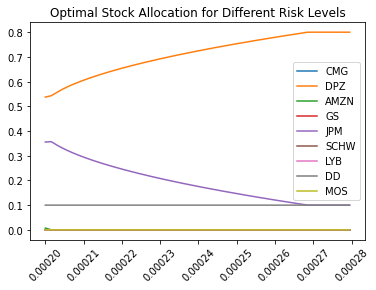

In [ ]:
# allocations in different risks
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'CMG', 'DPZ', 'AMZN', 'GS', 'JPM', 'SCHW', 'LYB', 'DD', 'MOS']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.xticks(rotation=45)
plt.show()

**Efficient Frontliner:** comprises investment portfolios that offer the highest expected return for a specific level of risk.

The graph above shows the optimal allocation of stocks at each risk level (x-axis)

On the lefthand side, we have low risk and high diversity.

On the righthand side, we have high risk and low diversity. Our effecient frontliner is the DPZ stock.

Next we will take a look at risk (X) vs. return (Y) of the efficient frontliner.

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk) # Risk 
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # Reward calculation

[0.0002, 0.00020050000000000002, 0.00020100000000000003, 0.00020150000000000005, 0.00020200000000000006, 0.00020250000000000007, 0.00020300000000000008, 0.0002035000000000001, 0.0002040000000000001, 0.00020450000000000012, 0.00020500000000000013, 0.00020550000000000014, 0.00020600000000000016, 0.00020650000000000017, 0.00020700000000000018, 0.0002075000000000002, 0.0002080000000000002, 0.00020850000000000022, 0.00020900000000000023, 0.00020950000000000024, 0.00021000000000000025, 0.00021050000000000026, 0.00021100000000000028, 0.0002115000000000003, 0.0002120000000000003, 0.0002125000000000003, 0.00021300000000000033, 0.00021350000000000034, 0.00021400000000000035, 0.00021450000000000036, 0.00021500000000000037, 0.00021550000000000039, 0.0002160000000000004, 0.0002165000000000004, 0.00021700000000000042, 0.00021750000000000043, 0.00021800000000000045, 0.00021850000000000046, 0.00021900000000000047, 0.00021950000000000048, 0.0002200000000000005, 0.0002205000000000005, 0.0002210000000000

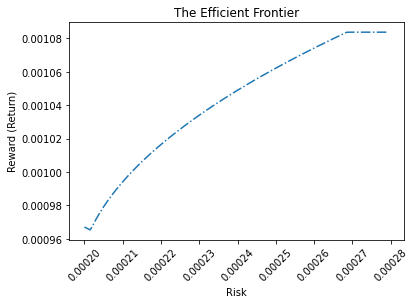

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.xticks(rotation=45)
plt.show()

With the efficient frontliner, we can see that at a certain point, taking on more risk doesn't increase our returns proportionately. This occurs at ~Risk = 0.00021 which achieves a max return around 0.10%. After this point, for every added unit of return, we are taking more risk (Slope <45 degrees)

# **Momentum Trading**

Now, we will be picking the three stocks - DPZ, JPM, and DD and evaluate whether momentum trading can generate better portfolio returns than buy and hold. Here we are considering "long" only trades and not trying to make money while shorting of stocks. We use multiple pairs of moving day averages and find out best possible (accurately predicts future price movement and thereby generates high returns) combination of trading days to generate buy/sell signal.


## **Stock 1: DPZ**

In [ ]:

# Extracting DPZ (Dominos) stock
df_dpz = pd.DataFrame(dow_prices['DPZ'])

# Removing redundant columns
df_dpz = df_dpz.iloc[:,:-3]


In [ ]:

# Computing moving averages at 10 day, 20 day, 50 day and 100 day. Used shift() to avoid data leakage
df_dpz['10-day'] = df_dpz['close'].rolling(10).mean().shift()
df_dpz['20-day'] = df_dpz['close'].rolling(20).mean().shift()
df_dpz['50-day'] = df_dpz['close'].rolling(50).mean().shift()
df_dpz['100-day'] = df_dpz['close'].rolling(100).mean().shift()

# Dropping missing values
df_dpz.dropna(inplace=True)

# Display head
df_dpz.head(n=10)

,open,high,low,close,10-day,20-day,50-day,100-day
2017-05-26,207.009995,207.720001,206.649994,207.050003,198.208002,193.966001,186.351601,182.1251
2017-05-30,207.000000,208.679993,206.679993,208.490005,199.385002,195.249001,186.780201,182.6120
2017-05-31,208.910004,212.050003,208.059998,211.720001,200.582002,196.565501,187.253401,183.0670
2017-06-01,213.779999,215.490005,210.880005,215.339996,202.131003,197.931001,187.814001,183.5565
2017-06-02,215.690002,219.410004,214.580002,218.050003,204.519002,199.344501,188.440401,184.0750
2017-06-05,217.990005,218.210007,216.000000,217.100006,206.853001,200.727501,189.118801,184.6104
2017-06-06,217.000000,218.429993,216.169998,217.850006,208.983002,201.926501,189.773801,185.1178
2017-06-07,218.509995,218.630005,215.679993,218.149994,210.886002,203.204502,190.471801,185.6067
2017-06-08,218.220001,218.580002,216.710007,217.880005,212.776001,204.344002,191.155801,186.1046
2017-06-09,213.899994,215.139999,204.630005,206.190002,213.967001,205.454502,191.814601,186.6118


## **[DPZ] Visualizing Moving Averages for 5 pairs**



1.   10 days - 20 days
2.   10 days - 50 days
3.   10 days - 100 days
4.   20 days - 50 days
5.   50 days - 100 days



Text(0.5, 1.0, '50 days & 100-days Moving Average')

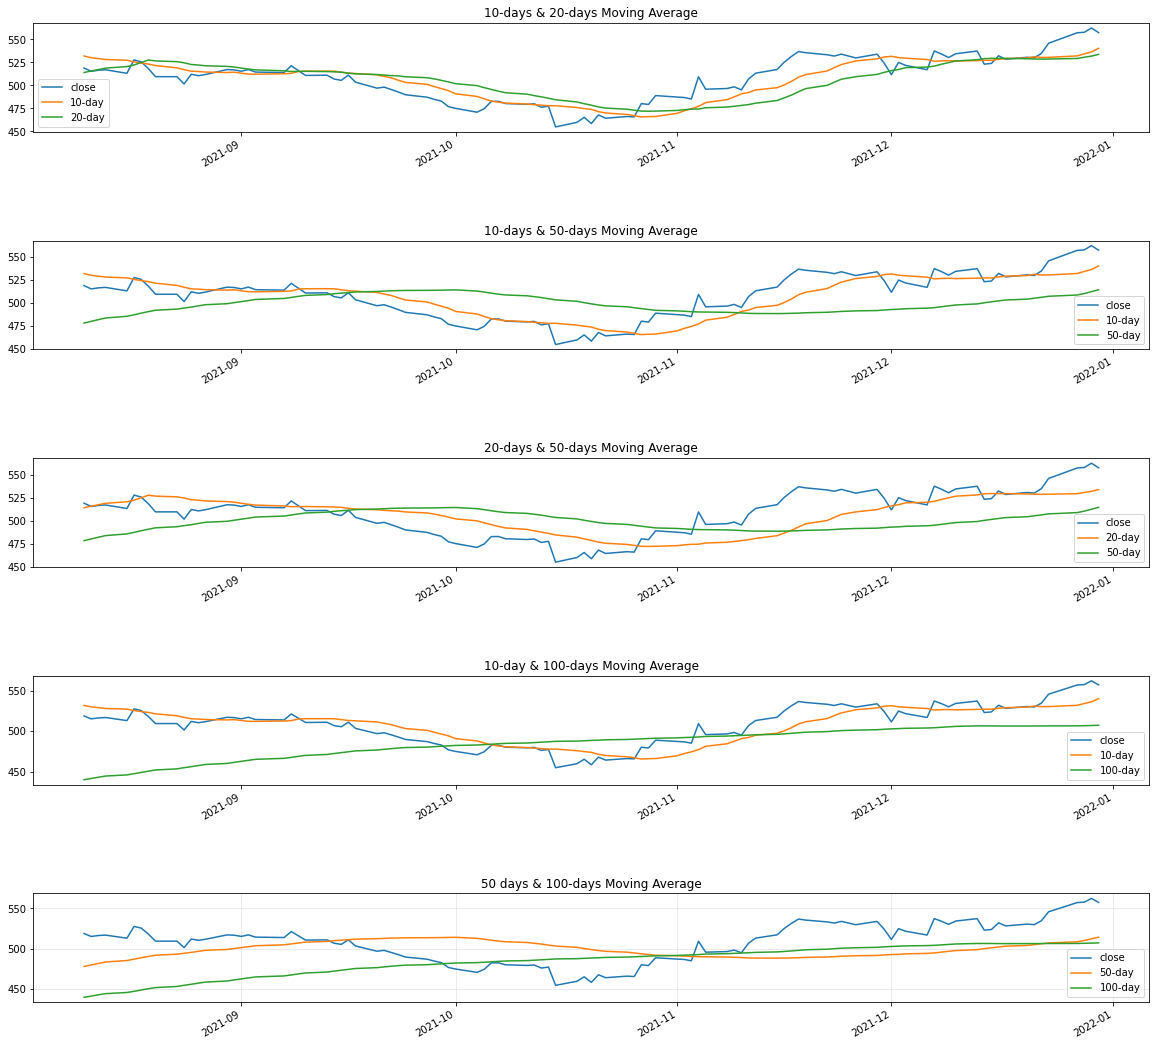

In [ ]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(5, 1)

plt.subplots_adjust(hspace=1)

# 10-day & 20-day
df_dpz.iloc[-100:,[3,4,5]].plot(figsize=(20,20),ax=ax1)
plt.grid(True, alpha = .3)
ax1.set_title('10-days & 20-days Moving Average')



# 10-day & 50-day
df_dpz.iloc[-100:,[3,4,6]].plot(figsize=(20,20),ax=ax2)
plt.grid(True, alpha = .3)
ax2.set_title('10-days & 50-days Moving Average')



# 20-day & 50-day
df_dpz.iloc[-100:,[3,5,6]].plot(figsize=(20,20),ax=ax3)
plt.grid(True, alpha = .3)
ax3.set_title('20-days & 50-days Moving Average')



# 10-day & 100-day
df_dpz.iloc[-100:,[3,4,7]].plot(figsize=(20,20),ax=ax4)
plt.grid(True, alpha = .3)
ax4.set_title('10-day & 100-days Moving Average')



# 50-day & 100-day
df_dpz.iloc[-100:,[3,6,7]].plot(figsize=(20,20),ax=ax5)
plt.grid(True, alpha = .3)
ax5.set_title('50 days & 100-days Moving Average')



## **[DPZ] Buy and Hold Strategy**

In [ ]:
df_dpz['logClose'] = np.log(df_dpz['close']) # price will always be positive, so this operation is well-defined
df_dpz['return'] = df_dpz['logClose'].diff() # the difference will be positive or negative
df_dpz.loc["2017-05-26",'return'] = 0.0
df_dpz.head()

,open,high,low,close,10-day,20-day,50-day,100-day,logClose,return
2017-05-26,207.009995,207.720001,206.649994,207.050003,198.208002,193.966001,186.351601,182.1251,5.332960,0.000000
2017-05-30,207.000000,208.679993,206.679993,208.490005,199.385002,195.249001,186.780201,182.6120,5.339891,0.006931
2017-05-31,208.910004,212.050003,208.059998,211.720001,200.582002,196.565501,187.253401,183.0670,5.355265,0.015374
2017-06-01,213.779999,215.490005,210.880005,215.339996,202.131003,197.931001,187.814001,183.5565,5.372218,0.016954
2017-06-02,215.690002,219.410004,214.580002,218.050003,204.519002,199.344501,188.440401,184.0750,5.384724,0.012506


### **[DPZ] Return of Buy and Hold Strategy**

In [ ]:
print("DPZ: The return from buy and hold strategy is:",np.exp(np.sum(df_dpz['return']))-1)


DPZ: The return from buy and hold strategy is: 1.6921514848043304


## **[DPZ] Momentum Trading Strategy**

In [ ]:
# Identifying change in price trends for all moving average pairs

df_dpz['invested_10_20'] = np.where(df_dpz['10-day'] > df_dpz['20-day'], 1, 0)
df_dpz['invested_10_50'] = np.where(df_dpz['10-day'] > df_dpz['50-day'], 1, 0)
df_dpz['invested_20_50'] = np.where(df_dpz['20-day'] > df_dpz['50-day'], 1, 0)
df_dpz['invested_10_100'] = np.where(df_dpz['10-day'] > df_dpz['100-day'], 1, 0)
df_dpz['invested_50_100'] = np.where(df_dpz['50-day'] > df_dpz['100-day'], 1, 0)

df_dpz.head()

,open,high,low,close,10-day,20-day,50-day,100-day,logClose,return,invested_10_20,invested_10_50,invested_20_50,invested_10_100,invested_50_100
2017-05-26,207.009995,207.720001,206.649994,207.050003,198.208002,193.966001,186.351601,182.1251,5.332960,0.000000,1,1,1,1,1
2017-05-30,207.000000,208.679993,206.679993,208.490005,199.385002,195.249001,186.780201,182.6120,5.339891,0.006931,1,1,1,1,1
2017-05-31,208.910004,212.050003,208.059998,211.720001,200.582002,196.565501,187.253401,183.0670,5.355265,0.015374,1,1,1,1,1
2017-06-01,213.779999,215.490005,210.880005,215.339996,202.131003,197.931001,187.814001,183.5565,5.372218,0.016954,1,1,1,1,1
2017-06-02,215.690002,219.410004,214.580002,218.050003,204.519002,199.344501,188.440401,184.0750,5.384724,0.012506,1,1,1,1,1


In [ ]:
## Number of days capital deployed in the markets and number of days capital not invested.
print(df_dpz['invested_10_20'].value_counts()) 
print(df_dpz['invested_10_50'].value_counts()) 
print(df_dpz['invested_20_50'].value_counts()) 
print(df_dpz['invested_10_100'].value_counts()) 
print(df_dpz['invested_50_100'].value_counts()) 

1    692
0    466
Name: invested_10_20, dtype: int64
1    738
0    420
Name: invested_10_50, dtype: int64
1    750
0    408
Name: invested_20_50, dtype: int64
1    752
0    406
Name: invested_10_100, dtype: int64
1    746
0    412
Name: invested_50_100, dtype: int64


**For investors/traders who are primarily in "long" position in the bull market. They would prefer to have a system that suggests that the capital is deployed for as long as possible. This approach would not work, however, in a bear market like the one we have had in 2022.**

In [ ]:
# Find the buy, sell action points (dates)

df_dpz['signal_10_20'] = df_dpz['invested_10_20'].diff()
df_dpz['signal_10_50'] = df_dpz['invested_10_50'].diff()
df_dpz['signal_20_50'] = df_dpz['invested_20_50'].diff()
df_dpz['signal_10_100'] = df_dpz['invested_10_100'].diff()
df_dpz['signal_50_100'] = df_dpz['invested_50_100'].diff()


# Invest on first day.. replacing NaN with 1.0
df_dpz.loc["2017-05-26",'signal_10_20'] = 1.0
df_dpz.loc["2017-05-26",'signal_10_50'] = 1.0
df_dpz.loc["2017-05-26",'signal_20_50'] = 1.0
df_dpz.loc["2017-05-26",'signal_10_100'] = 1.0
df_dpz.loc["2017-05-26",'signal_50_100'] = 1.0

print(df_dpz['signal_10_20'].value_counts()) 
print(df_dpz['signal_10_50'].value_counts()) 
print(df_dpz['signal_20_50'].value_counts()) 
print(df_dpz['signal_10_100'].value_counts())
print(df_dpz['signal_50_100'].value_counts()) 


 0.0    1089
 1.0      35
-1.0      34
Name: signal_10_20, dtype: int64
 0.0    1133
 1.0      13
-1.0      12
Name: signal_10_50, dtype: int64
 0.0    1137
 1.0      11
-1.0      10
Name: signal_20_50, dtype: int64
 0.0    1143
 1.0       8
-1.0       7
Name: signal_10_100, dtype: int64
 0.0    1145
 1.0       7
-1.0       6
Name: signal_50_100, dtype: int64


In [ ]:
# Calculating system returns

df_dpz['system_return_10_20'] = df_dpz['invested_10_20'] * df_dpz['return']
df_dpz['system_return_10_50'] = df_dpz['invested_10_50'] * df_dpz['return']
df_dpz['system_return_20_50'] = df_dpz['invested_20_50'] * df_dpz['return']
df_dpz['system_return_10_100'] = df_dpz['invested_10_100'] * df_dpz['return']
df_dpz['system_return_50_100'] = df_dpz['invested_50_100'] * df_dpz['return']
df_dpz.head()

,open,high,low,close,10-day,20-day,50-day,100-day,logClose,return,...,signal_10_20,signal_10_50,signal_20_50,signal_10_100,signal_50_100,system_return_10_20,system_return_10_50,system_return_20_50,system_return_10_100,system_return_50_100
2017-05-26,207.009995,207.720001,206.649994,207.050003,198.208002,193.966001,186.351601,182.1251,5.332960,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
2017-05-30,207.000000,208.679993,206.679993,208.490005,199.385002,195.249001,186.780201,182.6120,5.339891,0.006931,...,0.0,0.0,0.0,0.0,0.0,0.006931,0.006931,0.006931,0.006931,0.006931
2017-05-31,208.910004,212.050003,208.059998,211.720001,200.582002,196.565501,187.253401,183.0670,5.355265,0.015374,...,0.0,0.0,0.0,0.0,0.0,0.015374,0.015374,0.015374,0.015374,0.015374
2017-06-01,213.779999,215.490005,210.880005,215.339996,202.131003,197.931001,187.814001,183.5565,5.372218,0.016954,...,0.0,0.0,0.0,0.0,0.0,0.016954,0.016954,0.016954,0.016954,0.016954
2017-06-02,215.690002,219.410004,214.580002,218.050003,204.519002,199.344501,188.440401,184.0750,5.384724,0.012506,...,0.0,0.0,0.0,0.0,0.0,0.012506,0.012506,0.012506,0.012506,0.012506


In [ ]:
# Total stock return for different trading days pairs

print('10-20 days',np.exp(np.sum(df_dpz['system_return_10_20']))-1)
print('10-50 days',np.exp(np.sum(df_dpz['system_return_10_50']))-1)
print('20-50 days',np.exp(np.sum(df_dpz['system_return_20_50']))-1)
print('10-100 days',np.exp(np.sum(df_dpz['system_return_10_100']))-1)
print('50-100 days',np.exp(np.sum(df_dpz['system_return_50_100']))-1)

10-20 days 1.1012326528098777
10-50 days 0.7491531113341341
20-50 days 0.6278759488630299
10-100 days 1.0379681592353012
50-100 days 0.4628145377314916


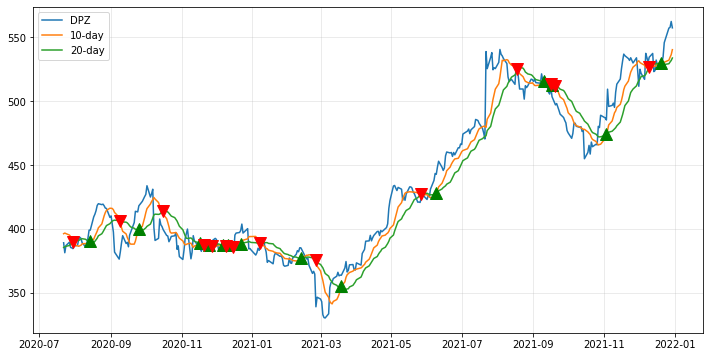

In [ ]:

# Buy and Sell points
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df_dpz.iloc[-365:]['close'], label = 'DPZ')
plt.plot(df_dpz.iloc[-365:]['10-day'], label = '10-day')
plt.plot(df_dpz.iloc[-365:]['20-day'], label = '20-day')
plt.plot(df_dpz[-365:].loc[df_dpz.signal_10_20 == 1].index, df_dpz[-365:]['10-day'][df_dpz.signal_10_20 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(df_dpz[-365:].loc[df_dpz.signal_10_20 == -1].index, df_dpz[-365:]['20-day'][df_dpz.signal_10_20 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

## **[DPZ] Comparing Buy & Hold vs MT**

**Extra Analysis - For our understanding**

Text(0.5, 1.0, '50-day & 100-day')

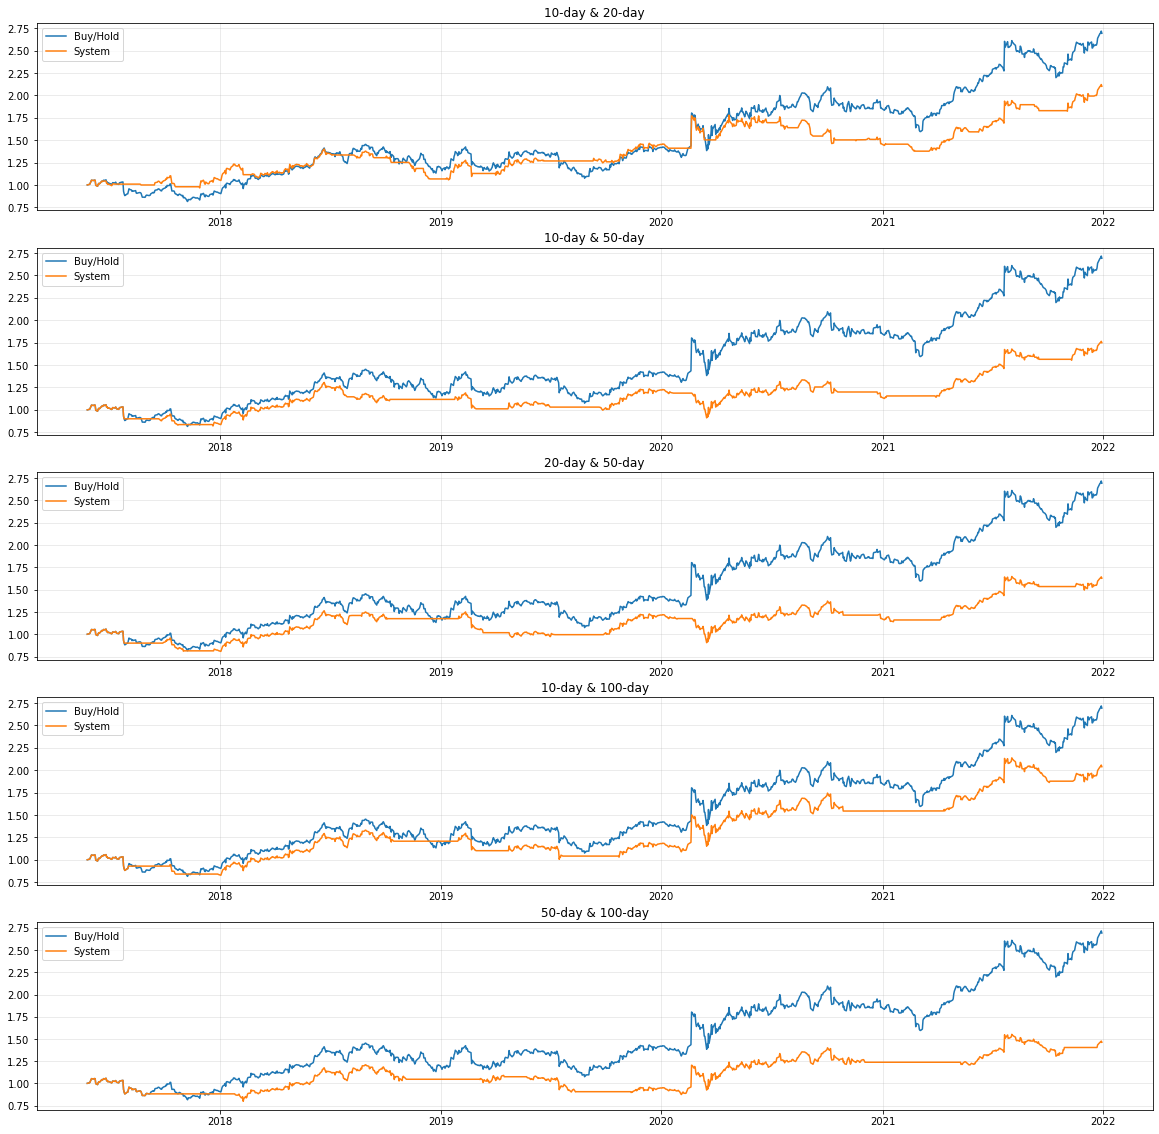

In [ ]:

#fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(5, 1)
fig = plt.figure(figsize=(20, 20))

# Adds subplot on position
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)


# 10_20
ax1.plot(np.exp(df_dpz['return']).cumprod(), label='Buy/Hold')
ax1.plot(np.exp(df_dpz['system_return_10_20']).cumprod(), label='System')
ax1.legend(loc=2)
ax1.grid(True, alpha=.3)
ax1.set_title('10-day & 20-day')

# 10_50
ax2.plot(np.exp(df_dpz['return']).cumprod(), label='Buy/Hold')
ax2.plot(np.exp(df_dpz['system_return_10_50']).cumprod(), label='System')
ax2.legend(loc=2)
ax2.grid(True, alpha=.3)
ax2.set_title('10-day & 50-day')

# 20_50
ax3.plot(np.exp(df_dpz['return']).cumprod(), label='Buy/Hold')
ax3.plot(np.exp(df_dpz['system_return_20_50']).cumprod(), label='System')
ax3.legend(loc=2)
ax3.grid(True, alpha=.3)
ax3.set_title('20-day & 50-day')


# 10_100
ax4.plot(np.exp(df_dpz['return']).cumprod(), label='Buy/Hold')
ax4.plot(np.exp(df_dpz['system_return_10_100']).cumprod(), label='System')
ax4.legend(loc=2)
ax4.grid(True, alpha=.3)
ax4.set_title('10-day & 100-day')

# 50_100
ax5.plot(np.exp(df_dpz['return']).cumprod(), label='Buy/Hold')
ax5.plot(np.exp(df_dpz['system_return_50_100']).cumprod(), label='System')
ax5.legend(loc=2)
ax5.grid(True, alpha=.3)
ax5.set_title('50-day & 100-day')


In [ ]:
print("DPZ: Returns from Buy & Hold Strategy:",np.exp(df_dpz['return']).cumprod()[-1]-1)

DPZ: Returns from Buy & Hold Strategy: 1.6921514848043202


In [ ]:
print('Returns using Momentum Trading strategy for different trading pairs:')
print('10_20',np.exp(df_dpz['system_return_10_20']).cumprod()[-1]-1)
print('10_50',np.exp(df_dpz['system_return_10_50']).cumprod()[-1]-1)
print('20-50',np.exp(df_dpz['system_return_20_50']).cumprod()[-1]-1)
print('10_100',np.exp(df_dpz['system_return_10_100']).cumprod()[-1]-1)
print('50-100',np.exp(df_dpz['system_return_50_100']).cumprod()[-1]-1)

Returns using Momentum Trading strategy for different trading pairs:
10_20 1.101232652809879
10_50 0.7491531113341319
20-50 0.6278759488630274
10_100 1.0379681592353007
50-100 0.4628145377314894


**The 10-20 trading pair is the best momentum trading strategy. However, investors would have made more money by buy & hold strategy in the case of DPZ.**

## **Stock 2: JPM**

In [ ]:

# Extracting JPM (JPMorgan) stock
df_jpm = pd.DataFrame(dow_prices['JPM'])

# Removing redundant columns
df_jpm = df_jpm.iloc[:,:-3]


In [ ]:

# Computing moving averages at 10 day, 20 day, 50 day and 100 day. Used shift() to avoid data leakage
df_jpm['10-day'] = df_jpm['close'].rolling(10).mean().shift()
df_jpm['20-day'] = df_jpm['close'].rolling(20).mean().shift()
df_jpm['50-day'] = df_jpm['close'].rolling(50).mean().shift()
df_jpm['100-day'] = df_jpm['close'].rolling(100).mean().shift()

# Dropping missing values
df_jpm.dropna(inplace=True)

# Display head
df_jpm.head(n=10)

,open,high,low,close,10-day,20-day,50-day,100-day
2017-05-26,85.110001,85.559998,85.019997,85.360001,85.639999,86.324999,86.8374,87.4867
2017-05-30,85.129997,85.150002,83.779999,83.900002,85.483999,86.242999,86.7118,87.4680
2017-05-31,83.730003,83.820000,81.639999,82.150002,85.139999,86.084999,86.5762,87.4379
2017-06-01,82.459999,83.080002,81.650002,83.059998,84.593999,85.867500,86.4186,87.3983
2017-06-02,82.290001,82.989998,81.980003,82.639999,84.473000,85.670499,86.3320,87.3677
2017-06-05,82.639999,83.510002,82.580002,82.790001,84.341000,85.447499,86.2342,87.3323
2017-06-06,82.290001,83.220001,82.129997,82.959999,84.142000,85.237000,86.1422,87.2959
2017-06-07,83.309998,84.110001,83.099998,83.910004,83.968000,85.030000,86.0556,87.2547
2017-06-08,83.910004,85.730003,83.889999,84.949997,83.783000,84.888000,85.9890,87.2314
2017-06-09,85.510002,87.050003,85.389999,86.959999,83.707000,84.764000,85.9160,87.2139


## **[JPM] Visualizing Moving Averages for 5 pairs**



1.   10 days - 20 days
2.   10 days - 50 days
3.   10 days - 100 days
4.   20 days - 50 days
5.   50 days - 100 days



Text(0.5, 1.0, '50 days & 100-days Moving Average')

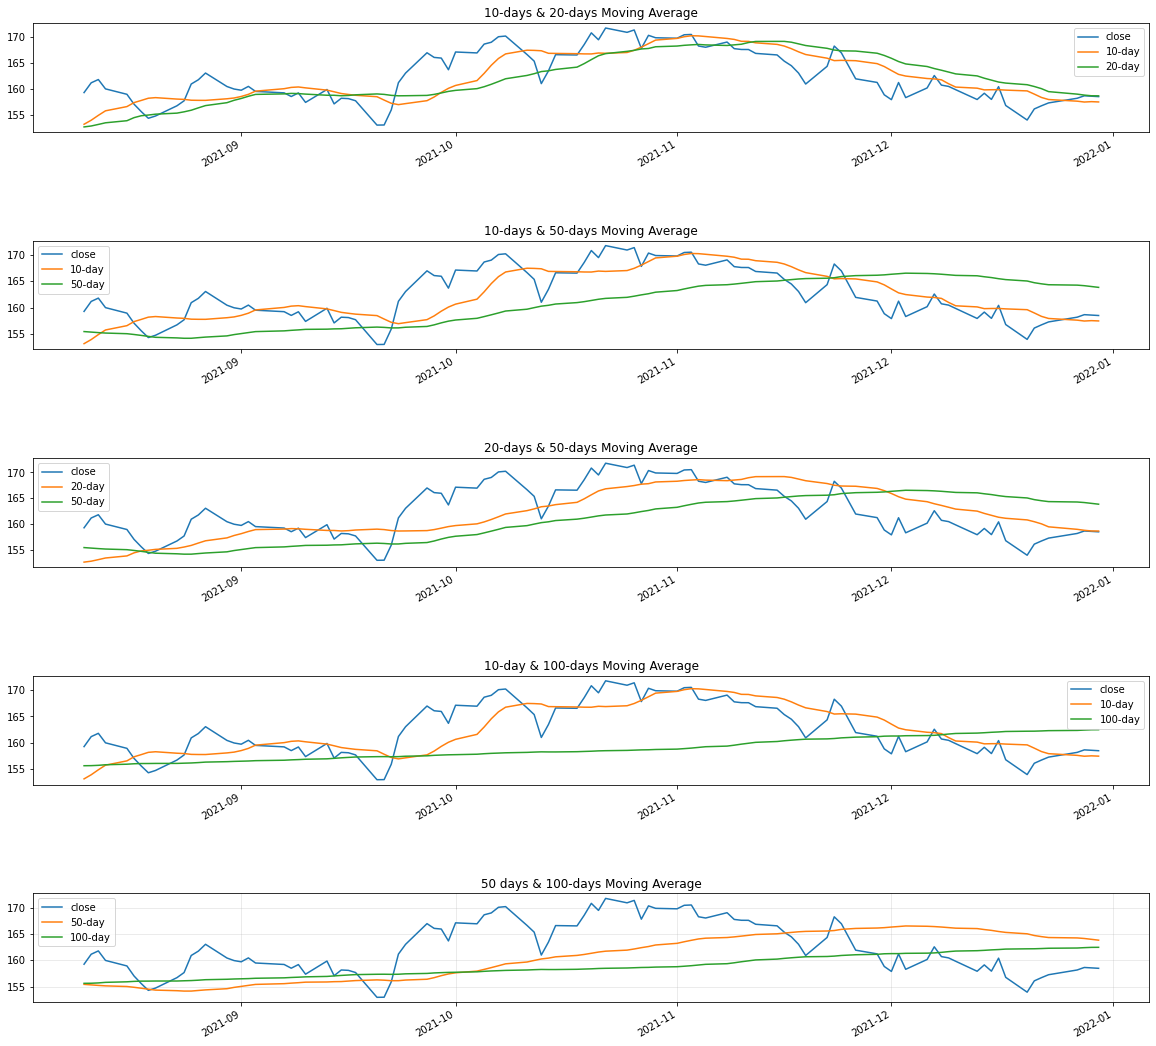

In [ ]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(5, 1)

plt.subplots_adjust(hspace=1)

# 10-day & 20-day
df_jpm.iloc[-100:,[3,4,5]].plot(figsize=(20,20),ax=ax1)
plt.grid(True, alpha = .3)
ax1.set_title('10-days & 20-days Moving Average')



# 10-day & 50-day
df_jpm.iloc[-100:,[3,4,6]].plot(figsize=(20,20),ax=ax2)
plt.grid(True, alpha = .3)
ax2.set_title('10-days & 50-days Moving Average')



# 20-day & 50-day
df_jpm.iloc[-100:,[3,5,6]].plot(figsize=(20,20),ax=ax3)
plt.grid(True, alpha = .3)
ax3.set_title('20-days & 50-days Moving Average')



# 10-day & 100-day
df_jpm.iloc[-100:,[3,4,7]].plot(figsize=(20,20),ax=ax4)
plt.grid(True, alpha = .3)
ax4.set_title('10-day & 100-days Moving Average')



# 50-day & 100-day
df_jpm.iloc[-100:,[3,6,7]].plot(figsize=(20,20),ax=ax5)
plt.grid(True, alpha = .3)
ax5.set_title('50 days & 100-days Moving Average')



## **[JPM] Buy and Hold Strategy**

In [ ]:
df_jpm['logClose'] = np.log(df_jpm['close']) # price will always be positive, so this operation is well-defined
df_jpm['return'] = df_jpm['logClose'].diff() # the difference will be positive or negative
df_jpm.loc["2017-05-26",'return'] = 0.0
df_jpm.head()

,open,high,low,close,10-day,20-day,50-day,100-day,logClose,return
2017-05-26,85.110001,85.559998,85.019997,85.360001,85.639999,86.324999,86.8374,87.4867,4.446878,0.000000
2017-05-30,85.129997,85.150002,83.779999,83.900002,85.483999,86.242999,86.7118,87.4680,4.429626,-0.017252
2017-05-31,83.730003,83.820000,81.639999,82.150002,85.139999,86.084999,86.5762,87.4379,4.408547,-0.021079
2017-06-01,82.459999,83.080002,81.650002,83.059998,84.593999,85.867500,86.4186,87.3983,4.419563,0.011016
2017-06-02,82.290001,82.989998,81.980003,82.639999,84.473000,85.670499,86.3320,87.3677,4.414494,-0.005069


### **[JPM] Return of Buy and Hold Strategy**

In [ ]:
print("JPM: The return from buy and hold strategy is:",np.exp(np.sum(df_jpm['return']))-1)


JPM: The return from buy and hold strategy is: 0.8566072468879562


## **[JPM] Momentum Trading Strategy**

In [ ]:
# Identifying change in price trends for all moving average pairs

df_jpm['invested_10_20'] = np.where(df_jpm['10-day'] > df_jpm['20-day'], 1, 0)
df_jpm['invested_10_50'] = np.where(df_jpm['10-day'] > df_jpm['50-day'], 1, 0)
df_jpm['invested_20_50'] = np.where(df_jpm['20-day'] > df_jpm['50-day'], 1, 0)
df_jpm['invested_10_100'] = np.where(df_jpm['10-day'] > df_jpm['100-day'], 1, 0)
df_jpm['invested_50_100'] = np.where(df_jpm['50-day'] > df_jpm['100-day'], 1, 0)

df_jpm.head()

,open,high,low,close,10-day,20-day,50-day,100-day,logClose,return,invested_10_20,invested_10_50,invested_20_50,invested_10_100,invested_50_100
2017-05-26,85.110001,85.559998,85.019997,85.360001,85.639999,86.324999,86.8374,87.4867,4.446878,0.000000,0,0,0,0,0
2017-05-30,85.129997,85.150002,83.779999,83.900002,85.483999,86.242999,86.7118,87.4680,4.429626,-0.017252,0,0,0,0,0
2017-05-31,83.730003,83.820000,81.639999,82.150002,85.139999,86.084999,86.5762,87.4379,4.408547,-0.021079,0,0,0,0,0
2017-06-01,82.459999,83.080002,81.650002,83.059998,84.593999,85.867500,86.4186,87.3983,4.419563,0.011016,0,0,0,0,0
2017-06-02,82.290001,82.989998,81.980003,82.639999,84.473000,85.670499,86.3320,87.3677,4.414494,-0.005069,0,0,0,0,0


In [ ]:
## Number of days capital deployed in the markets and number of days capital not invested.
print(df_jpm['invested_10_20'].value_counts()) 
print(df_jpm['invested_10_50'].value_counts()) 
print(df_jpm['invested_20_50'].value_counts()) 
print(df_jpm['invested_10_100'].value_counts()) 
print(df_jpm['invested_50_100'].value_counts()) 

1    668
0    490
Name: invested_10_20, dtype: int64
1    734
0    424
Name: invested_10_50, dtype: int64
1    729
0    429
Name: invested_20_50, dtype: int64
1    786
0    372
Name: invested_10_100, dtype: int64
1    824
0    334
Name: invested_50_100, dtype: int64


In [ ]:
# Find the buy, sell action points (dates)

df_jpm['signal_10_20'] = df_jpm['invested_10_20'].diff()
df_jpm['signal_10_50'] = df_jpm['invested_10_50'].diff()
df_jpm['signal_20_50'] = df_jpm['invested_20_50'].diff()
df_jpm['signal_10_100'] = df_jpm['invested_10_100'].diff()
df_jpm['signal_50_100'] = df_jpm['invested_50_100'].diff()


# Invest on first day.. replacing NaN with 1.0
df_jpm.loc["2017-05-26",'signal_10_20'] = 1.0
df_jpm.loc["2017-05-26",'signal_10_50'] = 1.0
df_jpm.loc["2017-05-26",'signal_20_50'] = 1.0
df_jpm.loc["2017-05-26",'signal_10_100'] = 1.0
df_jpm.loc["2017-05-26",'signal_50_100'] = 1.0

print(df_jpm['signal_10_20'].value_counts()) 
print(df_jpm['signal_10_50'].value_counts()) 
print(df_jpm['signal_20_50'].value_counts()) 
print(df_jpm['signal_10_100'].value_counts())
print(df_jpm['signal_50_100'].value_counts()) 


 0.0    1079
 1.0      40
-1.0      39
Name: signal_10_20, dtype: int64
 0.0    1125
 1.0      17
-1.0      16
Name: signal_10_50, dtype: int64
 0.0    1129
 1.0      15
-1.0      14
Name: signal_20_50, dtype: int64
 0.0    1129
 1.0      15
-1.0      14
Name: signal_10_100, dtype: int64
 0.0    1146
 1.0       7
-1.0       5
Name: signal_50_100, dtype: int64


In [ ]:
# Calculating system returns

df_jpm['system_return_10_20'] = df_jpm['invested_10_20'] * df_jpm['return']
df_jpm['system_return_10_50'] = df_jpm['invested_10_50'] * df_jpm['return']
df_jpm['system_return_20_50'] = df_jpm['invested_20_50'] * df_jpm['return']
df_jpm['system_return_10_100'] = df_jpm['invested_10_100'] * df_jpm['return']
df_jpm['system_return_50_100'] = df_jpm['invested_50_100'] * df_jpm['return']
df_jpm.head()

,open,high,low,close,10-day,20-day,50-day,100-day,logClose,return,...,signal_10_20,signal_10_50,signal_20_50,signal_10_100,signal_50_100,system_return_10_20,system_return_10_50,system_return_20_50,system_return_10_100,system_return_50_100
2017-05-26,85.110001,85.559998,85.019997,85.360001,85.639999,86.324999,86.8374,87.4867,4.446878,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-05-30,85.129997,85.150002,83.779999,83.900002,85.483999,86.242999,86.7118,87.4680,4.429626,-0.017252,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2017-05-31,83.730003,83.820000,81.639999,82.150002,85.139999,86.084999,86.5762,87.4379,4.408547,-0.021079,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2017-06-01,82.459999,83.080002,81.650002,83.059998,84.593999,85.867500,86.4186,87.3983,4.419563,0.011016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-02,82.290001,82.989998,81.980003,82.639999,84.473000,85.670499,86.3320,87.3677,4.414494,-0.005069,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
# Total stock return for different trading days pairs

print('10-20 days',np.exp(np.sum(df_jpm['system_return_10_20']))-1)
print('10-50 days',np.exp(np.sum(df_jpm['system_return_10_50']))-1)
print('20-50 days',np.exp(np.sum(df_jpm['system_return_20_50']))-1)
print('10-100 days',np.exp(np.sum(df_jpm['system_return_10_100']))-1)
print('50-100 days',np.exp(np.sum(df_jpm['system_return_50_100']))-1)

10-20 days -0.035612989009233265
10-50 days 0.2975201062568824
20-50 days 0.6125369817819899
10-100 days 0.269151746307118
50-100 days 0.48726606819492857


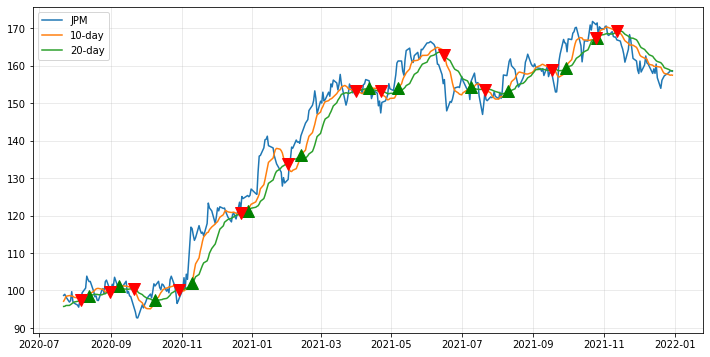

In [ ]:

# Buy and Sell points
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df_jpm.iloc[-365:]['close'], label = 'JPM')
plt.plot(df_jpm.iloc[-365:]['10-day'], label = '10-day')
plt.plot(df_jpm.iloc[-365:]['20-day'], label = '20-day')
plt.plot(df_jpm[-365:].loc[df_jpm.signal_10_20 == 1].index, df_jpm[-365:]['10-day'][df_jpm.signal_10_20 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(df_jpm[-365:].loc[df_jpm.signal_10_20 == -1].index, df_jpm[-365:]['20-day'][df_jpm.signal_10_20 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

## **[JPM] Comparing Buy & Hold vs MT**

**Extra Analysis - For our understanding**

Text(0.5, 1.0, '50-day & 100-day')

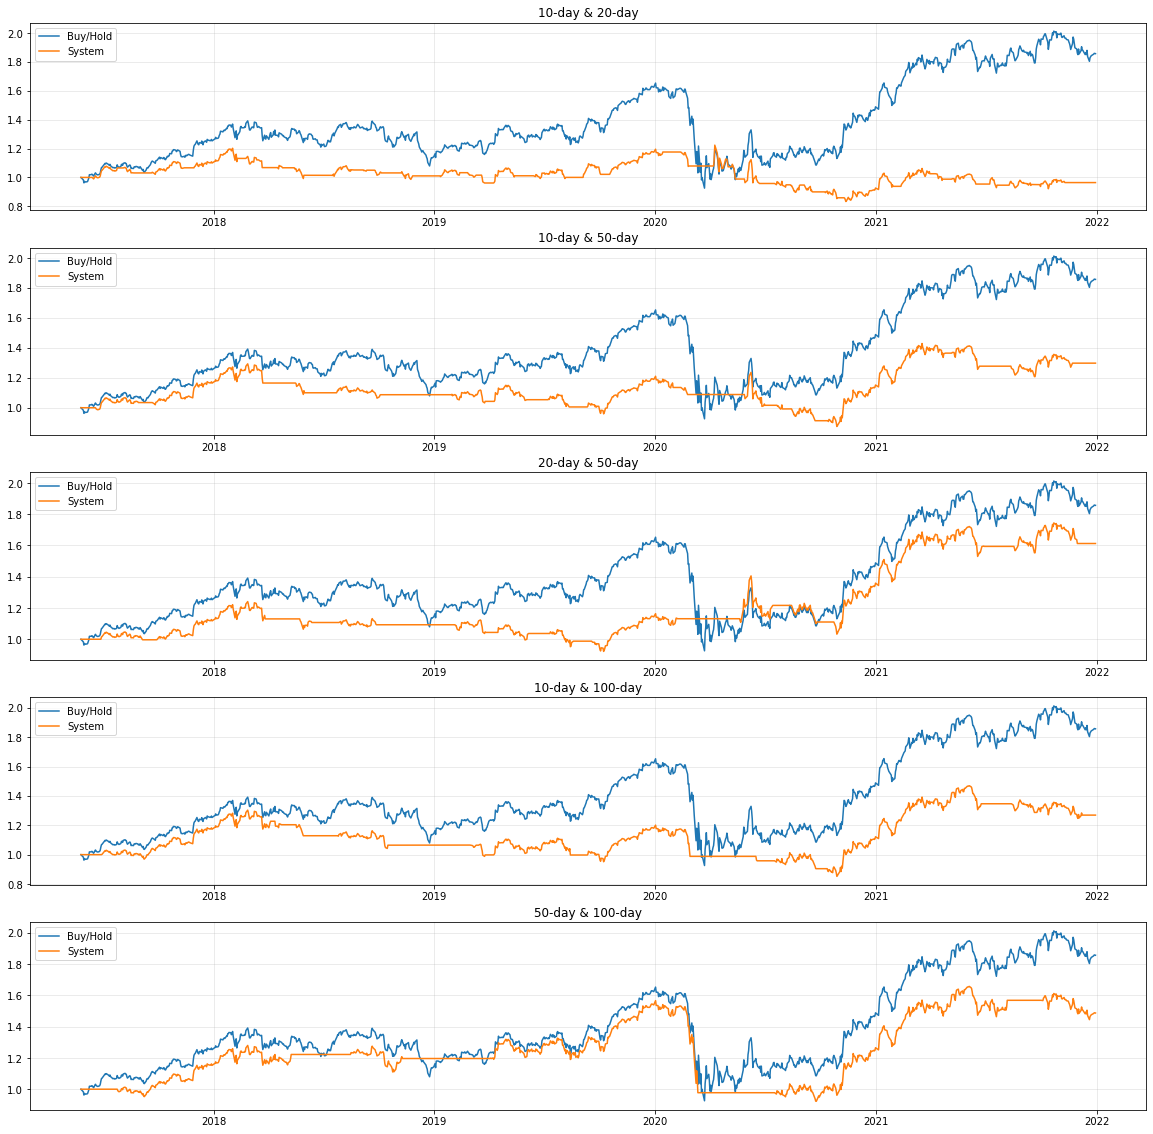

In [ ]:
fig = plt.figure(figsize=(20, 20))

# Adds subplot on position
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)


# 10_20
ax1.plot(np.exp(df_jpm['return']).cumprod(), label='Buy/Hold')
ax1.plot(np.exp(df_jpm['system_return_10_20']).cumprod(), label='System')
ax1.legend(loc=2)
ax1.grid(True, alpha=.3)
ax1.set_title('10-day & 20-day')

# 10_50
ax2.plot(np.exp(df_jpm['return']).cumprod(), label='Buy/Hold')
ax2.plot(np.exp(df_jpm['system_return_10_50']).cumprod(), label='System')
ax2.legend(loc=2)
ax2.grid(True, alpha=.3)
ax2.set_title('10-day & 50-day')


# 20_50
ax3.plot(np.exp(df_jpm['return']).cumprod(), label='Buy/Hold')
ax3.plot(np.exp(df_jpm['system_return_20_50']).cumprod(), label='System')
ax3.legend(loc=2)
ax3.grid(True, alpha=.3)
ax3.set_title('20-day & 50-day')


# 10_100
ax4.plot(np.exp(df_jpm['return']).cumprod(), label='Buy/Hold')
ax4.plot(np.exp(df_jpm['system_return_10_100']).cumprod(), label='System')
ax4.legend(loc=2)
ax4.grid(True, alpha=.3)
ax4.set_title('10-day & 100-day')


# 50_100
ax5.plot(np.exp(df_jpm['return']).cumprod(), label='Buy/Hold')
ax5.plot(np.exp(df_jpm['system_return_50_100']).cumprod(), label='System')
ax5.legend(loc=2)
ax5.grid(True, alpha=.3)
ax5.set_title('50-day & 100-day')


In [ ]:
print("JPM: Returns from Buy & Hold Strategy:",np.exp(df_jpm['return']).cumprod()[-1]-1)

JPM: Returns from Buy & Hold Strategy: 0.8566072468879558


In [ ]:
print('Returns using Momentum Trading strategy for different trading pairs:')
print('10_20',np.exp(df_jpm['system_return_10_20']).cumprod()[-1]-1)
print('10_50',np.exp(df_jpm['system_return_10_50']).cumprod()[-1]-1)
print('20-50',np.exp(df_jpm['system_return_20_50']).cumprod()[-1]-1)
print('10_100',np.exp(df_jpm['system_return_10_100']).cumprod()[-1]-1)
print('50-100',np.exp(df_jpm['system_return_50_100']).cumprod()[-1]-1)

Returns using Momentum Trading strategy for different trading pairs:
10_20 -0.035612989009234264
10_50 0.2975201062568833
20-50 0.6125369817819906
10_100 0.2691517463071196
50-100 0.4872660681949268


We are chosing 20-50 as best MT strategy although Buy & Hold is giving better returns.

## **Stock 3: DD**

In [ ]:

# Extracting DD (DuPont) stock
df_dd = pd.DataFrame(dow_prices['DD'])

# Removing redundant columns
df_dd = df_dd.iloc[:,:-3]


In [ ]:

# Computing moving averages at 10 day, 20 day, 50 day and 100 day. Used shift() to avoid data leakage
df_dd['10-day'] = df_dd['close'].rolling(10).mean().shift()
df_dd['20-day'] = df_dd['close'].rolling(20).mean().shift()
df_dd['50-day'] = df_dd['close'].rolling(50).mean().shift()
df_dd['100-day'] = df_dd['close'].rolling(100).mean().shift()

# Dropping missing values
df_dd.dropna(inplace=True)

# Display head
df_dd.head(n=10)

,open,high,low,close,10-day,20-day,50-day,100-day
2017-05-26,86.050888,87.047180,86.022423,86.904854,87.199467,87.851326,89.101241,87.743014
2017-05-30,86.477867,86.961784,86.264381,86.662895,87.059988,87.727501,89.021538,87.792260
2017-05-31,86.805222,88.214256,86.193214,88.185791,86.845074,87.611505,88.932157,87.832538
2017-06-01,88.185791,89.466736,88.071930,89.324409,86.796682,87.571653,88.859854,87.891746
2017-06-02,89.623299,90.278000,89.381340,89.737160,87.161039,87.646375,88.850746,87.967464
2017-06-05,89.665993,90.149902,89.452507,89.964882,87.512587,87.762371,88.858147,88.042328
2017-06-06,89.665993,91.174660,89.466736,90.704979,87.785855,87.770911,88.840498,88.121177
2017-06-07,91.003868,91.231590,90.007576,91.060799,88.177254,87.867693,88.859001,88.199030
2017-06-08,91.060799,91.416618,90.491493,91.046562,88.632700,88.020694,88.857862,88.280014
2017-06-09,91.188896,92.370209,91.075027,92.142487,88.991364,88.181524,88.828542,88.367830


## **[DD] Visualizing Moving Averages for 5 pairs**



1.   10 days - 20 days
2.   10 days - 50 days
3.   10 days - 100 days
4.   20 days - 50 days
5.   50 days - 100 days



Text(0.5, 1.0, '50 days & 100-days Moving Average')

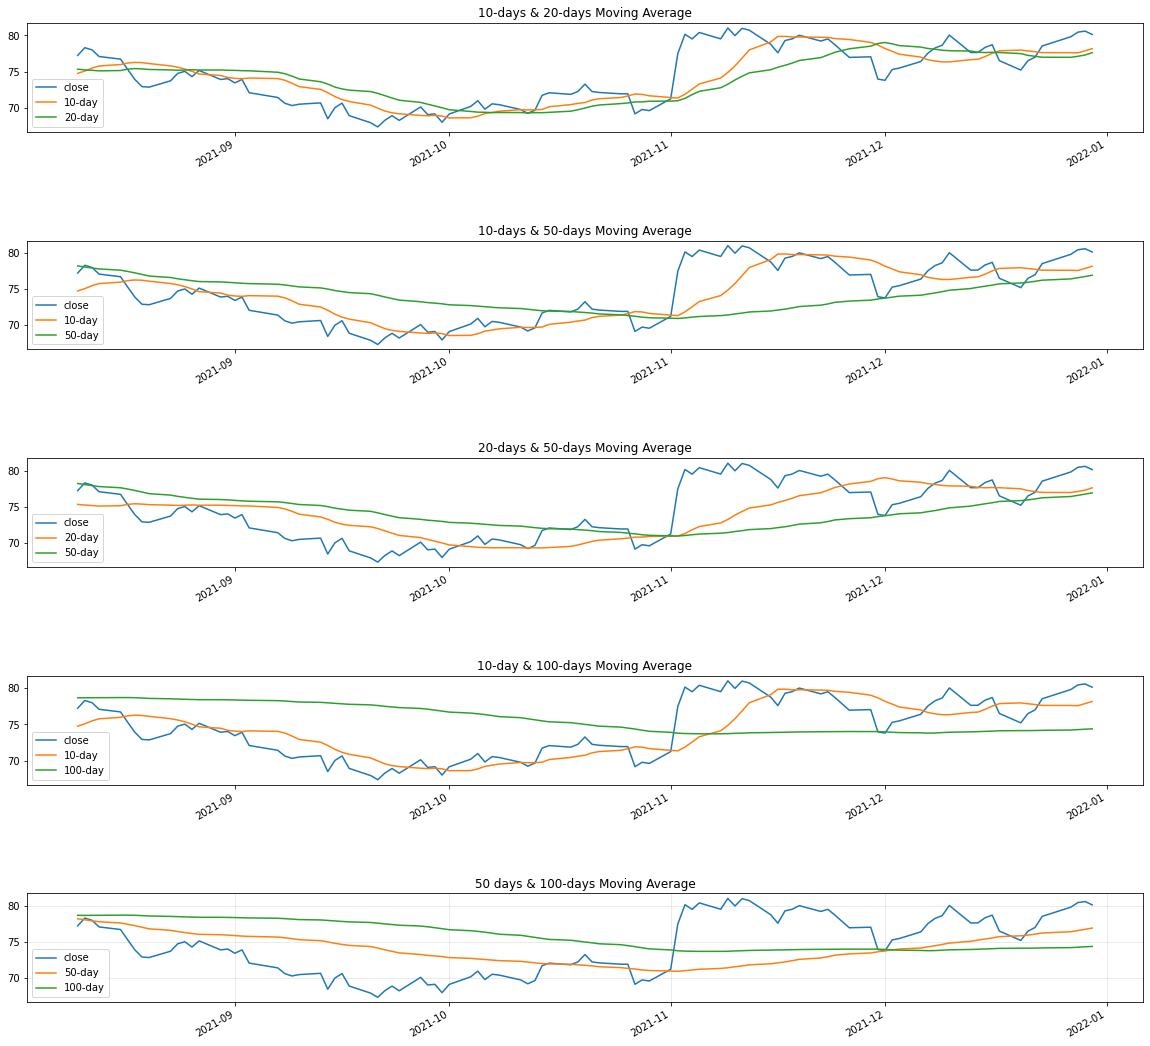

In [ ]:
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(5, 1)

plt.subplots_adjust(hspace=1)

# 10-day & 20-day
df_dd.iloc[-100:,[3,4,5]].plot(figsize=(20,20),ax=ax1)
plt.grid(True, alpha = .3)
ax1.set_title('10-days & 20-days Moving Average')



# 10-day & 50-day
df_dd.iloc[-100:,[3,4,6]].plot(figsize=(20,20),ax=ax2)
plt.grid(True, alpha = .3)
ax2.set_title('10-days & 50-days Moving Average')



# 20-day & 50-day
df_dd.iloc[-100:,[3,5,6]].plot(figsize=(20,20),ax=ax3)
plt.grid(True, alpha = .3)
ax3.set_title('20-days & 50-days Moving Average')



# 10-day & 100-day
df_dd.iloc[-100:,[3,4,7]].plot(figsize=(20,20),ax=ax4)
plt.grid(True, alpha = .3)
ax4.set_title('10-day & 100-days Moving Average')



# 50-day & 100-day
df_dd.iloc[-100:,[3,6,7]].plot(figsize=(20,20),ax=ax5)
plt.grid(True, alpha = .3)
ax5.set_title('50 days & 100-days Moving Average')



## **[DD] Buy and Hold Strategy**

In [ ]:
df_dd['logClose'] = np.log(df_dd['close']) # price will always be positive, so this operation is well-defined
df_dd['return'] = df_dd['logClose'].diff() # the difference will be positive or negative
df_dd.loc["2017-05-26",'return'] = 0.0
df_dd.head()

,open,high,low,close,10-day,20-day,50-day,100-day,logClose,return
2017-05-26,86.050888,87.047180,86.022423,86.904854,87.199467,87.851326,89.101241,87.743014,4.464814,0.000000
2017-05-30,86.477867,86.961784,86.264381,86.662895,87.059988,87.727501,89.021538,87.792260,4.462026,-0.002788
2017-05-31,86.805222,88.214256,86.193214,88.185791,86.845074,87.611505,88.932157,87.832538,4.479446,0.017420
2017-06-01,88.185791,89.466736,88.071930,89.324409,86.796682,87.571653,88.859854,87.891746,4.492275,0.012829
2017-06-02,89.623299,90.278000,89.381340,89.737160,87.161039,87.646375,88.850746,87.967464,4.496885,0.004610


### **[DD] Return of Buy and Hold Strategy**

In [ ]:
print("DD: The return from buy and hold strategy is:",np.exp(np.sum(df_dd['return']))-1)


DD: The return from buy and hold strategy is: -0.07795717119958168


## **[DD] Momentum Trading Strategy**

In [ ]:
# Identifying change in price trends for all moving average pairs

df_dd['invested_10_20'] = np.where(df_dd['10-day'] > df_dd['20-day'], 1, 0)
df_dd['invested_10_50'] = np.where(df_dd['10-day'] > df_dd['50-day'], 1, 0)
df_dd['invested_20_50'] = np.where(df_dd['20-day'] > df_dd['50-day'], 1, 0)
df_dd['invested_10_100'] = np.where(df_dd['10-day'] > df_dd['100-day'], 1, 0)
df_dd['invested_50_100'] = np.where(df_dd['50-day'] > df_dd['100-day'], 1, 0)

df_dd.head()

,open,high,low,close,10-day,20-day,50-day,100-day,logClose,return,invested_10_20,invested_10_50,invested_20_50,invested_10_100,invested_50_100
2017-05-26,86.050888,87.047180,86.022423,86.904854,87.199467,87.851326,89.101241,87.743014,4.464814,0.000000,0,0,0,0,1
2017-05-30,86.477867,86.961784,86.264381,86.662895,87.059988,87.727501,89.021538,87.792260,4.462026,-0.002788,0,0,0,0,1
2017-05-31,86.805222,88.214256,86.193214,88.185791,86.845074,87.611505,88.932157,87.832538,4.479446,0.017420,0,0,0,0,1
2017-06-01,88.185791,89.466736,88.071930,89.324409,86.796682,87.571653,88.859854,87.891746,4.492275,0.012829,0,0,0,0,1
2017-06-02,89.623299,90.278000,89.381340,89.737160,87.161039,87.646375,88.850746,87.967464,4.496885,0.004610,0,0,0,0,1


In [ ]:
## Number of days capital deployed in the markets and number of days capital not invested.
print(df_dd['invested_10_20'].value_counts()) 
print(df_dd['invested_10_50'].value_counts()) 
print(df_dd['invested_20_50'].value_counts()) 
print(df_dd['invested_10_100'].value_counts()) 
print(df_dd['invested_50_100'].value_counts()) 

1    631
0    527
Name: invested_10_20, dtype: int64
1    619
0    539
Name: invested_10_50, dtype: int64
1    617
0    541
Name: invested_20_50, dtype: int64
1    581
0    577
Name: invested_10_100, dtype: int64
1    582
0    576
Name: invested_50_100, dtype: int64


In [ ]:
# Find the buy, sell action points (dates)

df_dd['signal_10_20'] = df_dd['invested_10_20'].diff()
df_dd['signal_10_50'] = df_dd['invested_10_50'].diff()
df_dd['signal_20_50'] = df_dd['invested_20_50'].diff()
df_dd['signal_10_100'] = df_dd['invested_10_100'].diff()
df_dd['signal_50_100'] = df_dd['invested_50_100'].diff()


# Invest on first day.. replacing NaN with 1.0
df_dd.loc["2017-05-26",'signal_10_20'] = 1.0
df_dd.loc["2017-05-26",'signal_10_50'] = 1.0
df_dd.loc["2017-05-26",'signal_20_50'] = 1.0
df_dd.loc["2017-05-26",'signal_10_100'] = 1.0
df_dd.loc["2017-05-26",'signal_50_100'] = 1.0

print(df_dd['signal_10_20'].value_counts()) 
print(df_dd['signal_10_50'].value_counts()) 
print(df_dd['signal_20_50'].value_counts()) 
print(df_dd['signal_10_100'].value_counts())
print(df_dd['signal_50_100'].value_counts()) 


 0.0    1092
 1.0      34
-1.0      32
Name: signal_10_20, dtype: int64
 0.0    1124
 1.0      18
-1.0      16
Name: signal_10_50, dtype: int64
 0.0    1130
 1.0      15
-1.0      13
Name: signal_20_50, dtype: int64
 0.0    1140
 1.0      10
-1.0       8
Name: signal_10_100, dtype: int64
 0.0    1147
 1.0       6
-1.0       5
Name: signal_50_100, dtype: int64


In [ ]:
# Calculating system returns

df_dd['system_return_10_20'] = df_dd['invested_10_20'] * df_dd['return']
df_dd['system_return_10_50'] = df_dd['invested_10_50'] * df_dd['return']
df_dd['system_return_20_50'] = df_dd['invested_20_50'] * df_dd['return']
df_dd['system_return_10_100'] = df_dd['invested_10_100'] * df_dd['return']
df_dd['system_return_50_100'] = df_dd['invested_50_100'] * df_dd['return']
df_dd.head()

,open,high,low,close,10-day,20-day,50-day,100-day,logClose,return,...,signal_10_20,signal_10_50,signal_20_50,signal_10_100,signal_50_100,system_return_10_20,system_return_10_50,system_return_20_50,system_return_10_100,system_return_50_100
2017-05-26,86.050888,87.047180,86.022423,86.904854,87.199467,87.851326,89.101241,87.743014,4.464814,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000
2017-05-30,86.477867,86.961784,86.264381,86.662895,87.059988,87.727501,89.021538,87.792260,4.462026,-0.002788,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.002788
2017-05-31,86.805222,88.214256,86.193214,88.185791,86.845074,87.611505,88.932157,87.832538,4.479446,0.017420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017420
2017-06-01,88.185791,89.466736,88.071930,89.324409,86.796682,87.571653,88.859854,87.891746,4.492275,0.012829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012829
2017-06-02,89.623299,90.278000,89.381340,89.737160,87.161039,87.646375,88.850746,87.967464,4.496885,0.004610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004610


In [ ]:
# Total stock return for different trading days pairs

print('10-20 days',np.exp(np.sum(df_dd['system_return_10_20']))-1)
print('10-50 days',np.exp(np.sum(df_dd['system_return_10_50']))-1)
print('20-50 days',np.exp(np.sum(df_dd['system_return_20_50']))-1)
print('10-100 days',np.exp(np.sum(df_dd['system_return_10_100']))-1)
print('50-100 days',np.exp(np.sum(df_dd['system_return_50_100']))-1)

10-20 days 0.14825753526173568
10-50 days -0.24980331439475867
20-50 days 0.012721649927162515
10-100 days 0.11910164480271535
50-100 days 0.12669249964518547


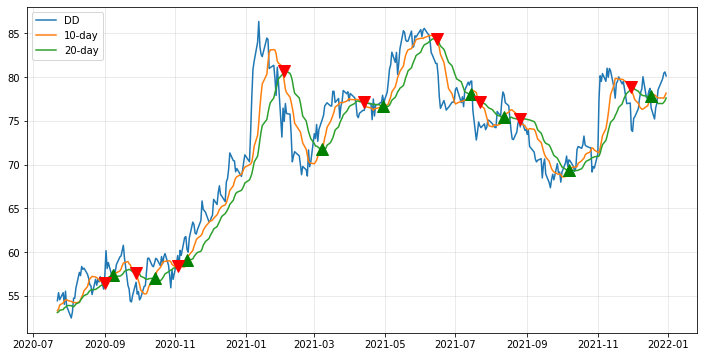

In [ ]:
# Buy and Sell points
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df_dd.iloc[-365:]['close'], label = 'DD')
plt.plot(df_dd.iloc[-365:]['10-day'], label = '10-day')
plt.plot(df_dd.iloc[-365:]['20-day'], label = '20-day')
plt.plot(df_dd[-365:].loc[df_dd.signal_10_20 == 1].index, df_dd[-365:]['10-day'][df_dd.signal_10_20 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(df_dd[-365:].loc[df_dd.signal_10_20 == -1].index, df_dd[-365:]['20-day'][df_dd.signal_10_20 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

## **[DD] Comparing Buy & Hold vs MT**

Text(0.5, 1.0, '50-day & 100-day')

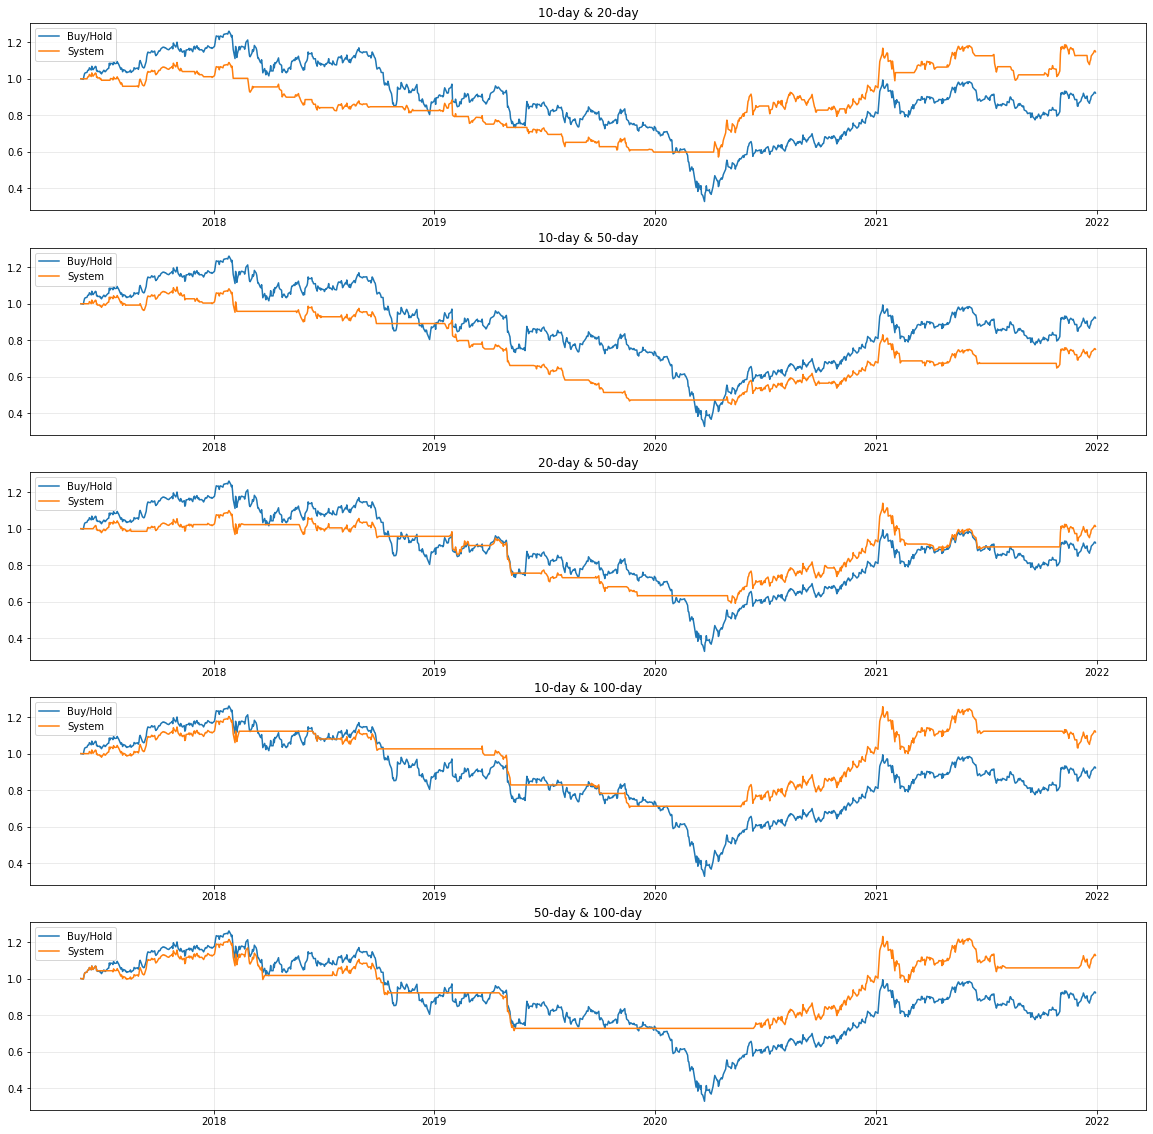

In [ ]:

#fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(5, 1)
fig = plt.figure(figsize=(20, 20))

# Adds subplot on position
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)


# 10_20
ax1.plot(np.exp(df_dd['return']).cumprod(), label='Buy/Hold')
ax1.plot(np.exp(df_dd['system_return_10_20']).cumprod(), label='System')
ax1.legend(loc=2)
ax1.grid(True, alpha=.3)
ax1.set_title('10-day & 20-day')

# 10_50
ax2.plot(np.exp(df_dd['return']).cumprod(), label='Buy/Hold')
ax2.plot(np.exp(df_dd['system_return_10_50']).cumprod(), label='System')
ax2.legend(loc=2)
ax2.grid(True, alpha=.3)
ax2.set_title('10-day & 50-day')

# 20_50
ax3.plot(np.exp(df_dd['return']).cumprod(), label='Buy/Hold')
ax3.plot(np.exp(df_dd['system_return_20_50']).cumprod(), label='System')
ax3.legend(loc=2)
ax3.grid(True, alpha=.3)
ax3.set_title('20-day & 50-day')

# 10_100
ax4.plot(np.exp(df_dd['return']).cumprod(), label='Buy/Hold')
ax4.plot(np.exp(df_dd['system_return_10_100']).cumprod(), label='System')
ax4.legend(loc=2)
ax4.grid(True, alpha=.3)
ax4.set_title('10-day & 100-day')


# 50_100
ax5.plot(np.exp(df_dd['return']).cumprod(), label='Buy/Hold')
ax5.plot(np.exp(df_dd['system_return_50_100']).cumprod(), label='System')
ax5.legend(loc=2)
ax5.grid(True, alpha=.3)
ax5.set_title('50-day & 100-day')


In [ ]:
print("DD: Returns from Buy & Hold Strategy:",np.exp(df_dd['return']).cumprod()[-1]-1)

DD: Returns from Buy & Hold Strategy: -0.07795717119957601


In [ ]:
print('Returns using Momentum Trading strategy for different trading pairs:')
print('10_20',np.exp(df_dd['system_return_10_20']).cumprod()[-1]-1)
print('10_50',np.exp(df_dd['system_return_10_50']).cumprod()[-1]-1)
print('20_50',np.exp(df_dd['system_return_20_50']).cumprod()[-1]-1)
print('10_100',np.exp(df_dd['system_return_10_100']).cumprod()[-1]-1)
print('50-100',np.exp(df_dd['system_return_50_100']).cumprod()[-1]-1)

Returns using Momentum Trading strategy for different trading pairs:
10_20 0.14825753526173813
10_50 -0.24980331439475745
20_50 0.012721649927166068
10_100 0.11910164480271734
50-100 0.12669249964518658


**We are picking 10-20 as best momentum trading strategy for DD. The buy and hold strategy would have given lower returns to an investor for DD stock.**

# **ANALYSIS**

## **BUY & HOLD STRATEGY (DPZ, JPM,DD)**




In [ ]:
# Assign the ticker list that we want to scrape
tickers_list_1 = ['DPZ','JPM','DD']
# pull historical price data for each stocks to match with our news score later
prices_22_stocks = {ticker : si.get_data(ticker,start_date = '12/31/2021',end_date='11/02/2022',interval='1d') for ticker in tickers_list_1}

In [ ]:
df_2022_bh = pd.DataFrame()
# combine all the tickers (all the rest of the samples)
for i in tickers_list_1:
  df_2022_bh[i+'_price'] = pd.DataFrame(prices_22_stocks[i]['close'])

print(df_2022_bh.head())

             DPZ_price   JPM_price   DD_price
2021-12-31  564.330017  158.350006  80.779999
2022-01-03  553.219971  161.699997  80.660004
2022-01-04  535.280029  167.830002  82.540001
2022-01-05  520.530029  163.779999  81.790001
2022-01-06  524.409973  165.520004  81.989998


In [ ]:
# first day of each month when the market opens
date_range_index = ['2022-01-03','2022-02-01','2022-03-01','2022-04-01','2022-05-02','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-03','2022-11-01']

In [ ]:
# extract information on these days from 2022 daily data
df_2022_bh = df_2022_bh.loc[date_range_index,:]

In [ ]:
# initial investment on DPZ
DPZ_allocation = 80000

# initial shares we got
DPZ_stocks = round(DPZ_allocation/df_2022_bh.loc['2022-01-03','DPZ_price'],1)
print('Total number of stocks allocated to CMG on January 3rd :',DPZ_stocks)
df_2022_bh['DPZ_Account_Position'] = DPZ_stocks*df_2022_bh['DPZ_price']


Total number of stocks allocated to CMG on January 3rd : 144.6


In [ ]:
# initial investment on JPM
JPM_allocation = 10000

# initial shares we got
JPM_stocks = round(JPM_allocation/df_2022_bh.loc['2022-01-03','JPM_price'],1)
print('Total number of stocks allocated to JPM on January 3rd :',JPM_stocks)
df_2022_bh['JPM_Account_Position'] = JPM_stocks*df_2022_bh['JPM_price']


Total number of stocks allocated to JPM on January 3rd : 61.8


In [ ]:
# initial investment on DD
DD_allocation = 10000

# initial shares we got
DD_stocks = round(DD_allocation/df_2022_bh.loc['2022-01-03','DD_price'],1)
print('Total number of stocks allocated to DD on January 3rd :',DD_stocks)
df_2022_bh['DD_Account_Position'] = DD_stocks*df_2022_bh['DD_price']


Total number of stocks allocated to DD on January 3rd : 124.0


In [ ]:
# add action column
df_2022_bh['Action'] = ['Buy','Hold','Hold','Hold','Hold','Hold','Hold','Hold','Hold','Hold','Sell']

**We will keep holding the stock for the 10 months and sell everything on November 1. Hence all actions are 'hold' except for the first and the last action that are 'buy' and 'sell' respectively.**

In [ ]:
# calculate return
print('Total portfolio return from Buy and Hold Strategy:',((df_2022_bh.loc['2022-11-01',['DPZ_Account_Position','JPM_Account_Position','DD_Account_Position']].sum())-100000)/100000)

Total portfolio return from Buy and Hold Strategy: -0.36586105929565427


### **Table**

In [ ]:
# final outcome
# account position changed everyday according to the price
# shares did not change in specific period in this strategy
df_2022_bh

,DPZ_price,JPM_price,DD_price,DPZ_Account_Position,JPM_Account_Position,DD_Account_Position,Action
2022-01-03,553.219971,161.699997,80.660004,79995.607764,9993.059811,10001.840454,Buy
2022-02-01,458.299988,151.149994,77.889999,66270.178235,9341.069623,9658.359924,Hold
2022-03-01,432.209991,136.449997,75.620003,62497.564764,8432.609811,9376.880341,Hold
2022-04-01,397.179993,135.309998,74.750000,57432.226941,8362.157849,9269.000000,Hold
2022-05-02,351.119995,120.449997,65.900002,50771.951294,7443.809811,8171.600189,Hold
2022-06-01,360.850006,129.910004,67.419998,52178.910883,8028.438226,8360.079773,Hold
2022-07-01,403.609985,114.050003,54.750000,58362.003882,7048.290189,6789.000000,Hold
2022-08-01,390.119995,114.209999,60.200001,56411.351294,7058.177943,7464.800095,Hold
2022-09-01,371.619995,114.510002,55.230000,53736.251294,7076.718132,6848.519943,Hold
2022-10-03,316.440002,107.730003,52.430000,45757.224353,6657.714207,6501.320038,Hold


**Using Buy and Sell Strategy with the portfolio allocation of 80% DPZ, 10% JPM and 10% DD, we are losing about 36.5%.**

**Here we perform buy operation on 3rd January (as 1st is holiday), and then we hold stock till November and then perform sell operation on 1st November.**

**In this table we also track account position at the 1st of every month even though we are not taking any sell or buy action.**

## **MOMENTUM TRADING STRATEGIES**

* For DPZ MT with trading days 10-20 days is giving maximum return.
* For JPM MT with trading days 20-50 days is giving maximum return.
* For DD MT with trading days 10-20 days is giving maximum return.

**Strategy:**
Allocate 80% (80K) of DPZ, 10% (10K) of JPM and 10% (10K) of DD stock

### **DPZ (ANALYSIS)**
*   proportion is 80%
*   Best strategy from momentum trading (MT) (10-20)



In [ ]:
# Assign the ticker list that we want to scrape
tickers_list_1 = ['DPZ']
# pull historical price data for each stocks to match with our news score later
mt_prices_dpz22 = {ticker : si.get_data(ticker,start_date = '12/03/2021',end_date='11/02/2022',interval='1d') for ticker in tickers_list_1}

In [ ]:
# extract close price
df_mt_prices_dpz22 = pd.DataFrame(mt_prices_dpz22['DPZ'])
df_mt_prices_dpz22 = df_mt_prices_dpz22[['close']]
df_mt_prices_dpz22.columns=['DPZ_price']

In [ ]:
df_mt_prices_dpz22['logClose'] = np.log(df_mt_prices_dpz22['DPZ_price']) # price will always be positive, so this operation is well-defined
df_mt_prices_dpz22['return'] = df_mt_prices_dpz22['logClose'].diff()

In [ ]:
# create moving average columns
df_mt_prices_dpz22['10-day'] = df_mt_prices_dpz22['DPZ_price'].rolling(10).mean().shift()
df_mt_prices_dpz22['20-day'] = df_mt_prices_dpz22['DPZ_price'].rolling(20).mean().shift()
df_mt_prices_dpz22.dropna(inplace=True)
df_mt_prices_dpz22.head(n=10)

,DPZ_price,logClose,return,10-day,20-day
2022-01-03,553.219971,6.315756,-0.019884,546.874011,538.026505
2022-01-04,535.280029,6.282790,-0.032966,549.358008,539.599002
2022-01-05,520.530029,6.254848,-0.027942,549.825012,540.509003
2022-01-06,524.409973,6.262274,0.007426,548.882013,539.664005
2022-01-07,508.429993,6.231328,-0.030946,547.840009,539.176004
2022-01-10,502.649994,6.219894,-0.011433,544.099005,538.083005
2022-01-11,486.420013,6.187072,-0.032822,538.643002,536.494505
2022-01-12,486.890015,6.188038,0.000966,531.508002,533.947507
2022-01-13,481.399994,6.176699,-0.011340,523.957001,532.134506
2022-01-14,473.040009,6.159180,-0.017519,516.356003,530.008507


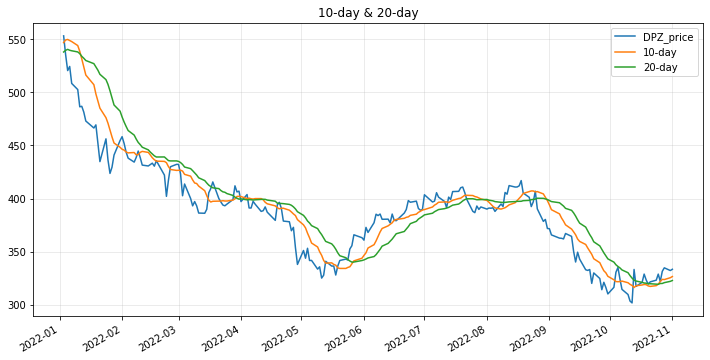

In [ ]:
# 10-day & 20-day
df_mt_prices_dpz22.iloc[:,[0,3,4]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.title('10-day & 20-day')
plt.show()

In [ ]:
# create invested column
df_mt_prices_dpz22['invested_10_20'] = np.where(df_mt_prices_dpz22['10-day'] > df_mt_prices_dpz22['20-day'], 1, 0)

In [ ]:
# create signal column
df_mt_prices_dpz22['signal_10_20'] = df_mt_prices_dpz22['invested_10_20'].diff()
df_mt_prices_dpz22.loc["2022-01-03",'signal_10_20'] = 1.0

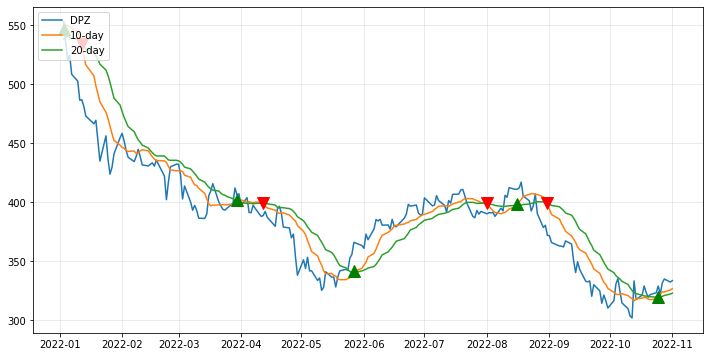

In [ ]:
# label buy and sell points
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df_mt_prices_dpz22.iloc[:]['DPZ_price'], label = 'DPZ')
plt.plot(df_mt_prices_dpz22.iloc[:]['10-day'], label = '10-day')
plt.plot(df_mt_prices_dpz22.iloc[:]['20-day'], label = '20-day')
plt.plot(df_mt_prices_dpz22[:].loc[df_mt_prices_dpz22.signal_10_20 == 1].index, df_mt_prices_dpz22[:]['10-day'][df_mt_prices_dpz22.signal_10_20 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(df_mt_prices_dpz22[:].loc[df_mt_prices_dpz22.signal_10_20 == -1].index, df_mt_prices_dpz22[:]['20-day'][df_mt_prices_dpz22.signal_10_20 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

In [ ]:

initial_position  = 80000 # Initial allocation of DPZ  stock on 1st day (3rd January)
initial_share = initial_position/df_mt_prices_dpz22.loc['2022-01-03','DPZ_price'] # lets calculate how many shares that will be allocated on first day
position = [initial_position] # add our initial allocation to position list
shares = [initial_share] # add our initial share allocation to position list

# now lets update position and shares list based on signal
for date,index in zip(df_mt_prices_dpz22.index,range(len(df_mt_prices_dpz22.index))):

  
  if df_mt_prices_dpz22.loc[date,'signal_10_20'] == 1:  ## if signal is 1, means buy call
    if index==0: # for first index no need to do anything as it is already added to our position and share list
      continue


    position.append(position[index-1]) # we would be buying shares with the money we are left with after selling stocks
    shares.append(position[index]/df_mt_prices_dpz22.loc[date,'DPZ_price']) # Number of shares would be the position divided by price of the stock on that particular day (buy call signal day)
  
 
  if df_mt_prices_dpz22.loc[date,'signal_10_20'] == 0: ## if signal is 0, mean hold
    #position.append(df_mt_prices_dd22.loc[date,'DD_price']*shares[index-1])

    if shares[index-1] == 0: # if shares of previous day are zero
      position.append(position[index-1])  # append amount position of previous day as we wont be performing any buy/sell operation
      shares.append(shares[index-1])  # append shares of previous day as we wont be performing any buy/sell operation
    else:
      position.append(df_mt_prices_dpz22.loc[date,'DPZ_price']*shares[index-1]) #calculated by multiplying shares of previous day with stock price of current day
      shares.append(shares[index-1]) # append shares of previous day since we are holding the stocks

    
    

  
  if df_mt_prices_dpz22.loc[date,'signal_10_20'] == -1: # if signal is -1, means sell call
    position.append(shares[index-1]*df_mt_prices_dpz22.loc[date,'DPZ_price']) # the return would be the number of shares multipled by the share price on that particular day
    shares.append(0) # since its a sell, the number of shares would be zero


In [ ]:
# create table (date, close price, account position, shares and signal)
df = pd.DataFrame()
df['date'] = df_mt_prices_dpz22.index
df['DPZ_price'] = df_mt_prices_dpz22['DPZ_price'].values
df['DPZ_Account_Position'] = position
df['DPZ_shares'] = shares
df['DPZ_signal'] = df_mt_prices_dpz22['signal_10_20'].values

# create action list according signal
action = []
for i in df['DPZ_signal']:
  if i == 0.0:
    action.append('Hold')
  elif i == 1.0:
    action.append('Buy')
  else:
    action.append('Sell')

# add action column to table
df['DPZ_Action'] = action

# show table
df[df['DPZ_signal'].isin([1,-1])]

,date,DPZ_price,DPZ_Account_Position,DPZ_shares,DPZ_signal,DPZ_Action
0,2022-01-03,553.219971,80000.000000,144.607939,1.0,Buy
7,2022-01-12,486.890015,70408.161734,0.000000,-1.0,Sell
60,2022-03-30,406.269989,70408.161734,173.303871,1.0,Buy
69,2022-04-12,388.570007,67340.686392,0.000000,-1.0,Sell
101,2022-05-27,365.910004,67340.686392,184.036199,1.0,Buy
144,2022-08-01,390.119995,71796.201207,0.000000,-1.0,Sell
155,2022-08-16,410.929993,71796.201207,174.716381,1.0,Buy
166,2022-08-31,371.859985,64970.030918,0.000000,-1.0,Sell
204,2022-10-25,328.880005,64970.030918,197.549349,1.0,Buy


**Within 1 week of buy, a sell signal was generate for DPZ. This resulted in sell signal being on 'hold' for a long period of time before a buy signal was generated on March-30. This is understandable as the overall markets were going down. There are several false positives in our signals as one can see, after Mar-30, the prices kept trending downwards and a similar instane happened when a buy signal was generate on Aug-16 but prices kept going downwards before a "sell" signal was eventually generated on Aug-31.**

In [ ]:
# convert date to index
df.set_index('date', inplace=True)

In [ ]:
# first day of each month when the market opens
date_range_index = ['2022-01-03','2022-02-01','2022-03-01','2022-04-01','2022-05-02','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-03','2022-11-01']

df_month_dpz = df.loc[date_range_index,:]


# We sold the stocks on Nov 1st 2022
df_month_dpz.loc['2022-11-01','DPZ_Action'] = 'Sell'
df_month_dpz.loc['2022-11-01','DPZ_shares'] = 0
df_month_dpz.loc['2022-11-01','DPZ_signal'] = -1

df_month_dpz

,DPZ_price,DPZ_Account_Position,DPZ_shares,DPZ_signal,DPZ_Action
date,,,,,
2022-01-03,553.219971,80000.000000,144.607939,1.0,Buy
2022-02-01,458.299988,70408.161734,0.000000,0.0,Hold
2022-03-01,432.209991,70408.161734,0.000000,0.0,Hold
2022-04-01,397.179993,68832.830182,173.303871,0.0,Hold
2022-05-02,351.119995,67340.686392,0.000000,0.0,Hold
2022-06-01,360.850006,66409.463673,184.036199,0.0,Hold
2022-07-01,403.609985,74278.847739,184.036199,0.0,Hold
2022-08-01,390.119995,71796.201207,0.000000,-1.0,Sell
2022-09-01,371.619995,64970.030918,0.000000,0.0,Hold


In [ ]:
# calculate return
print('DPZ: Total portfolio return from Momentum Trading (10-20):',(df.loc['2022-11-01','DPZ_Account_Position']-80000)/80000)

DPZ: Total portfolio return from Momentum Trading (10-20): -0.17661430665714614


### **JPM (ANALYSIS)**
*   proportion is 10%
*   Best strategy from momentum trading (MT) (20-50)



In [ ]:
# Assign the ticker list that we want to scrap
tickers_list_1 = ['JPM']
# pull historical price data for each stocks to match with our news score later
mt_prices_jpm22 = {ticker : si.get_data(ticker,start_date = '10/15/2021',end_date='11/02/2022',interval='1d') for ticker in tickers_list_1}

In [ ]:
# extract close price
df_mt_prices_jpm22 = pd.DataFrame(mt_prices_jpm22['JPM'])
df_mt_prices_jpm22 = df_mt_prices_jpm22[['close']]
df_mt_prices_jpm22.columns=['JPM_price']


In [ ]:
df_mt_prices_jpm22['logClose'] = np.log(df_mt_prices_jpm22['JPM_price']) # price will always be positive, so this operation is well-defined
df_mt_prices_jpm22['return'] = df_mt_prices_jpm22['logClose'].diff()

In [ ]:
# create moving average columns
df_mt_prices_jpm22['20-day'] = df_mt_prices_jpm22['JPM_price'].rolling(20).mean().shift()
df_mt_prices_jpm22['50-day'] = df_mt_prices_jpm22['JPM_price'].rolling(50).mean().shift()
df_mt_prices_jpm22.dropna(inplace=True)
df_mt_prices_jpm22.head()

,JPM_price,logClose,return,20-day,50-day
2021-12-28,158.639999,5.066637,0.003030,158.774001,164.154001
2021-12-29,158.559998,5.066133,-0.000504,158.644501,163.994601
2021-12-30,158.479996,5.065628,-0.000505,158.631001,163.834800
2021-12-31,158.350006,5.064808,-0.000821,158.660501,163.633000
2022-01-03,161.699997,5.085743,0.020935,158.517501,163.383200


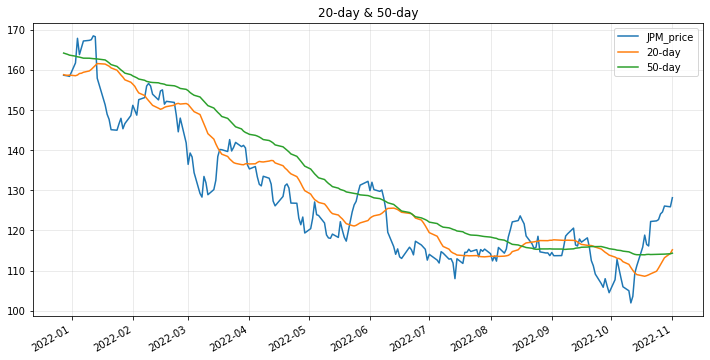

In [ ]:
# 20-day & 50-day
df_mt_prices_jpm22.iloc[:,[0,3,4]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.title('20-day & 50-day')
plt.show()

In [ ]:
# create invested column
df_mt_prices_jpm22['invested_20_50'] = np.where(df_mt_prices_jpm22['20-day'] > df_mt_prices_jpm22['50-day'], 1, 0)

In [ ]:
# create signal column
df_mt_prices_jpm22['signal_20_50'] = df_mt_prices_jpm22['invested_20_50'].diff()
df_mt_prices_jpm22.loc["2022-01-03",'signal_20_50'] = 1.0

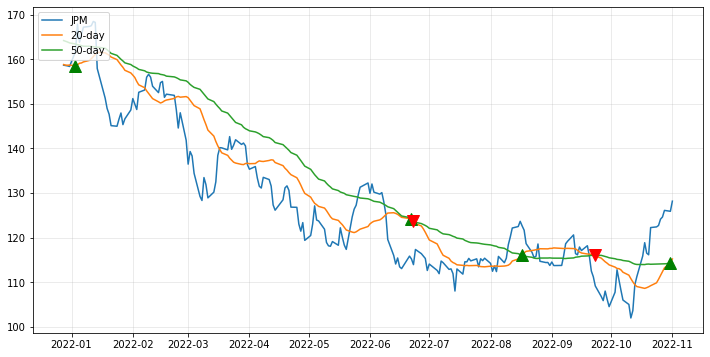

In [ ]:
# label buy and sell points
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df_mt_prices_jpm22.iloc[:]['JPM_price'], label = 'JPM')
plt.plot(df_mt_prices_jpm22.iloc[:]['20-day'], label = '20-day')
plt.plot(df_mt_prices_jpm22.iloc[:]['50-day'], label = '50-day')
plt.plot(df_mt_prices_jpm22[:].loc[df_mt_prices_jpm22.signal_20_50 == 1].index, df_mt_prices_jpm22[:]['20-day'][df_mt_prices_jpm22.signal_20_50 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(df_mt_prices_jpm22[:].loc[df_mt_prices_jpm22.signal_20_50 == -1].index, df_mt_prices_jpm22[:]['50-day'][df_mt_prices_jpm22.signal_20_50 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

In [ ]:
initial_position  = 10000 # Initial allocation of JMP  stock on 1st day (3rd January)
initial_share = initial_position/df_mt_prices_jpm22.loc['2022-01-03','JPM_price'] # lets calculate how many shares that will be allocated on first day
position = [initial_position] # add our initial allocation to position list
shares = [initial_share] # add our initial share allocation to position list
# now lets update position and shares list based on signal
for date,index in zip(df_mt_prices_jpm22.index,range(len(df_mt_prices_jpm22.index))):

  
  if df_mt_prices_jpm22.loc[date,'signal_20_50'] == 1: ## if signal is 1, means buy call
    if index==0:  # for first index no need to do anything as it is already added to our position and share list
      continue


    position.append(position[index-1])  # we would be buying shares with the money we are left with after selling stocks
    shares.append(position[index]/df_mt_prices_jpm22.loc[date,'JPM_price']) # Number of shares would be the position divided by price of the stock on that particular day (buy call signal day)
  
  
 
  if df_mt_prices_jpm22.loc[date,'signal_20_50'] == 0: ## if signal is 0, mean hold
    #position.append(df_mt_prices_dd22.loc[date,'DD_price']*shares[index-1])

    if shares[index-1] == 0: #if shares of previous day are zero
      position.append(position[index-1]) # append amount position of previous day as we wont be performing any buy/sell operation
      shares.append(shares[index-1]) # append shares of previous day as we wont be performing any buy/sell operation
    else:
      position.append(df_mt_prices_jpm22.loc[date,'JPM_price']*shares[index-1]) #calculated by multiplying shares of previous day with stock price of current day
      shares.append(shares[index-1]) #calculated by multiplying shares of previous day with stock price of current day
    
    
    

  
  if df_mt_prices_jpm22.loc[date,'signal_20_50'] == -1: # if signal is -1, means sell call
    position.append(shares[index-1]*df_mt_prices_jpm22.loc[date,'JPM_price']) # the return would be the number of shares multipled by the share price on that particular day
    shares.append(0) # since its a sell, the number of shares would be zero



  

In [ ]:
# create table (date, close price, account position, shares and signal)
df = pd.DataFrame()
df['date'] = df_mt_prices_jpm22.index
df['JPM_price'] = df_mt_prices_jpm22['JPM_price'].values
df['JPM_Account_position'] = position
df['JPM_shares'] = shares
df['JPM_signal'] = df_mt_prices_jpm22['signal_20_50'].values

# create action list according signal
action = []
for i in df['JPM_signal']:
  if i == 0.0:
    action.append('Hold')
  elif i == 1.0:
    action.append('Buy')
  else:
    action.append('Sell')

# add action column to the table
df['JPM_Action'] = action

# show table
df[df['JPM_signal'].isin([1,-1])]

,date,JPM_price,JPM_Account_position,JPM_shares,JPM_signal,JPM_Action
4,2022-01-03,161.699997,9792.826784,60.561700,1.0,Buy
121,2022-06-22,115.180000,7014.861878,60.903472,1.0,Buy
122,2022-06-23,113.919998,6938.123374,0.000000,-1.0,Sell
160,2022-08-17,122.589996,6938.123374,56.596163,1.0,Buy
186,2022-09-23,109.139999,6176.905159,0.000000,-1.0,Sell
212,2022-10-31,125.879997,6176.905159,49.069791,1.0,Buy


In [ ]:
# convert date into index
df.set_index('date', inplace=True)

In [ ]:
date_range_index = ['2022-01-03','2022-02-01','2022-03-01','2022-04-01','2022-05-02','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-03','2022-11-01']

df_month_jpm = df.loc[date_range_index,:]

# We sold the stocks on Nov 1st 2022
df_month_jpm.loc['2022-11-01','JPM_Action'] = 'Sell'
df_month_jpm.loc['2022-11-01','JPM_shares'] = 0
df_month_jpm.loc['2022-11-01','JPM_signal'] = -1

#print
df_month_jpm

,JPM_price,JPM_Account_position,JPM_shares,JPM_signal,JPM_Action
date,,,,,
2022-01-03,161.699997,9792.826784,60.561700,1.0,Buy
2022-02-01,151.149994,9153.900659,60.561700,0.0,Hold
2022-03-01,136.449997,8263.643846,60.561700,0.0,Hold
2022-04-01,135.309998,8194.603545,60.561700,0.0,Hold
2022-05-02,120.449997,7294.656639,60.561700,0.0,Hold
2022-06-01,129.910004,7867.570732,60.561700,0.0,Hold
2022-07-01,114.050003,6938.123374,0.000000,0.0,Hold
2022-08-01,114.209999,6938.123374,0.000000,0.0,Hold
2022-09-01,114.510002,6480.826708,56.596163,0.0,Hold


In [ ]:
# calculate return
print('JPM: Total portfolio return from Momentum Trading (20-50):',(df.loc['2022-11-01','JPM_Account_position']-10000)/10000)

JPM: Total portfolio return from Momentum Trading (20-50): -0.3711706580438893


**Our model performed poorly for JPM. The pair with longer time frame for momentum trading for a "long" only strategy can be a curse in bear market. Since the data is backwards looking, the signal takes time to show up. For over 6 months period, the prices kept trending downwards and the 50 day MA price kept below 20 day MA price. This erroneously indicated that we should continue to hold our positions. One way to prevent such errors in real life is by having "stop loss" prices in our portfolio drawdown. A good practice would be to have 2% stop price to ensure that we do not lose more than 2% of capital for any trade until a fresh "buy" signal is generated again.**

### **DD (ANALYSIS)**
*   proportion is 10%
*   Best strategy from momentum trading (MT) (10-20)



In [ ]:
# Assign the ticker list that we want to scrap
tickers_list_1 = ['DD']
# pull historical price data for each stocks to match with our news score later
mt_prices_dd22 = {ticker : si.get_data(ticker,start_date = '12/03/2021',end_date='11/02/2022',interval='1d') for ticker in tickers_list_1}

In [ ]:
# extract close price
df_mt_prices_dd22 = pd.DataFrame(mt_prices_dd22['DD'])
df_mt_prices_dd22 = df_mt_prices_dd22[['close']]
df_mt_prices_dd22.columns=['DD_price']


In [ ]:
df_mt_prices_dd22['logClose'] = np.log(df_mt_prices_dd22['DD_price']) # price will always be positive, so this operation is well-defined
df_mt_prices_dd22['return'] = df_mt_prices_dd22['logClose'].diff()

In [ ]:
# add moving average columns
df_mt_prices_dd22['10-day'] = df_mt_prices_dd22['DD_price'].rolling(10).mean().shift()
df_mt_prices_dd22['20-day'] = df_mt_prices_dd22['DD_price'].rolling(20).mean().shift()
df_mt_prices_dd22.dropna(inplace=True)
df_mt_prices_dd22.head(n=10)

,DD_price,logClose,return,10-day,20-day
2022-01-03,80.660004,4.390243,-0.001487,78.550999,78.208999
2022-01-04,82.540001,4.413283,0.023040,78.965999,78.467999
2022-01-05,81.790001,4.404155,-0.009128,79.698999,78.775499
2022-01-06,81.989998,4.406597,0.002442,80.228999,78.987999
2022-01-07,83.190002,4.421127,0.014530,80.727999,79.174499
2022-01-10,81.970001,4.406353,-0.014774,81.192999,79.401999
2022-01-11,83.029999,4.419202,0.012849,81.409000,79.498499
2022-01-12,83.720001,4.427478,0.008276,81.667000,79.768499
2022-01-13,84.010002,4.430936,0.003458,81.980000,80.072499
2022-01-14,84.970001,4.442298,0.011362,82.368001,80.356000


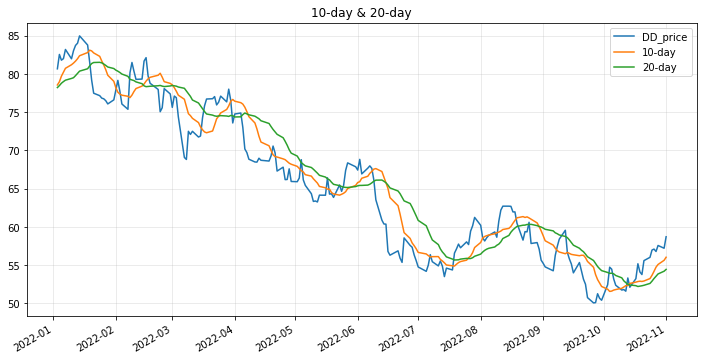

In [ ]:
# 10-day & 20-day
df_mt_prices_dd22.iloc[:,[0,3,4]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.title('10-day & 20-day')
plt.show()

In [ ]:
# create invested column
df_mt_prices_dd22['invested_10_20'] = np.where(df_mt_prices_dd22['10-day'] > df_mt_prices_dd22['20-day'], 1, 0)

In [ ]:
# create signal column
df_mt_prices_dd22['signal_10_20'] = df_mt_prices_dd22['invested_10_20'].diff()
df_mt_prices_dd22.loc["2022-01-03",'signal_10_20'] = 1.0

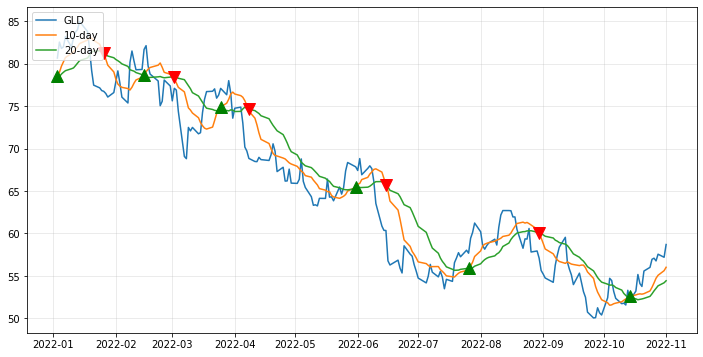

In [ ]:
# label buy and sell points
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df_mt_prices_dd22.iloc[:]['DD_price'], label = 'GLD')
plt.plot(df_mt_prices_dd22.iloc[:]['10-day'], label = '10-day')
plt.plot(df_mt_prices_dd22.iloc[:]['20-day'], label = '20-day')
plt.plot(df_mt_prices_dd22[:].loc[df_mt_prices_dd22.signal_10_20 == 1].index, df_mt_prices_dd22[:]['10-day'][df_mt_prices_dd22.signal_10_20 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(df_mt_prices_dd22[:].loc[df_mt_prices_dd22.signal_10_20 == -1].index, df_mt_prices_dd22[:]['20-day'][df_mt_prices_dd22.signal_10_20 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

In [ ]:
initial_position  = 10000 # Initial allocation of DD stock on 1st day (3rd January)
initial_share = initial_position/df_mt_prices_dd22.loc['2022-01-03','DD_price'] # lets calculate how many shares that will be allocated on first day
position = [initial_position] # add our initial allocation to position list
shares = [initial_share] # add our initial share allocation to position list
# now lets update position and shares list based on signal
for date,index in zip(df_mt_prices_dd22.index,range(len(df_mt_prices_dd22.index))):

  
  if df_mt_prices_dd22.loc[date,'signal_10_20'] == 1: ## if signal is 1, means buy call
    if index==0: # for first index no need to do anything as it is already added to our position and share list
      continue

 
    position.append(position[index-1]) # we would be buying shares with the money we are left with after selling stocks
    shares.append(position[index]/df_mt_prices_dd22.loc[date,'DD_price'])  # Number of shares would be the position divided by price of the stock on that particular day (buy call signal day)
   
 
  if df_mt_prices_dd22.loc[date,'signal_10_20'] == 0:
    #position.append(df_mt_prices_dd22.loc[date,'DD_price']*shares[index-1])

    if shares[index-1] == 0: # if shares of previous day are zero
      position.append(position[index-1])  # append amount position of previous day as we wont be performing any buy/sell operation
      shares.append(shares[index-1])  # append shares of previous day as we wont be performing any buy/sell operation
    else:
      position.append(df_mt_prices_dd22.loc[date,'DD_price']*shares[index-1]) #calculated by multiplying shares of previous day with stock price of current day
      shares.append(shares[index-1]) # append shares of previous day since we are holding the stocks
    
    
    

  
  if df_mt_prices_dd22.loc[date,'signal_10_20'] == -1: #if signal is -1, means sell call
    position.append(shares[index-1]*df_mt_prices_dd22.loc[date,'DD_price']) # the return would be the number of shares multipled by the share price on that particular day
    shares.append(0) # since its a sell, the number of shares would be zero after selling



  

In [ ]:
# create table (date, close price, account position, shares and signal)
df = pd.DataFrame()
df['date'] = df_mt_prices_dd22.index
df['DD_price'] = df_mt_prices_dd22['DD_price'].values
df['DD_Account_position'] = position
df['DD_shares'] = shares
df['DD_signal'] = df_mt_prices_dd22['signal_10_20'].values

# create action list according signal
action = []
for i in df['DD_signal']:
  if i == 0.0:
    action.append('Hold')
  elif i == 1.0:
    action.append('Buy')
  else:
    action.append('Sell')

# add action column to the table
df['DD_Action'] = action

# show table
df[df['DD_signal'].isin([1,-1])]

,date,DD_price,DD_Account_position,DD_shares,DD_signal,DD_Action
0,2022-01-03,80.660004,10000.000000,123.977183,1.0,Buy
16,2022-01-26,76.739998,9514.008725,0.000000,-1.0,Sell
30,2022-02-15,81.669998,9514.008725,116.493314,1.0,Buy
40,2022-03-02,77.099998,8981.634317,0.000000,-1.0,Sell
57,2022-03-25,77.089996,8981.634317,116.508428,1.0,Buy
67,2022-04-08,68.839996,8020.439783,0.000000,-1.0,Sell
102,2022-05-31,67.849998,8020.439783,118.208400,1.0,Buy
113,2022-06-15,60.349998,7133.876780,0.000000,-1.0,Sell
140,2022-07-26,57.680000,7133.876780,123.680249,1.0,Buy
165,2022-08-30,57.099998,7062.142010,0.000000,-1.0,Sell


In [ ]:
# convert date into index
df.set_index('date', inplace=True)

In [ ]:
date_range_index = ['2022-01-03','2022-02-01','2022-03-01','2022-04-01','2022-05-02','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-03','2022-11-01']

df_month_dd = df.loc[date_range_index,:]

# We sold the stocks on Nov 1st 2022
df_month_dd.loc['2022-11-01','DD_Action'] = 'Sell'
df_month_dd.loc['2022-11-01','DD_shares'] = 0
df_month_dd.loc['2022-11-01','DD_signal'] = -1

# show table
df_month_dd

,DD_price,DD_Account_position,DD_shares,DD_signal,DD_Action
date,,,,,
2022-01-03,80.660004,10000.000000,123.977183,1.0,Buy
2022-02-01,77.889999,9514.008725,0.000000,0.0,Hold
2022-03-01,75.620003,8809.224710,116.493314,0.0,Hold
2022-04-01,74.750000,8709.005021,116.508428,0.0,Hold
2022-05-02,65.900002,8020.439783,0.000000,0.0,Hold
2022-06-01,67.419998,7969.610135,118.208400,0.0,Hold
2022-07-01,54.750000,7133.876780,0.000000,0.0,Hold
2022-08-01,60.200001,7445.551063,123.680249,0.0,Hold
2022-09-01,55.230000,7062.142010,0.000000,0.0,Hold


In [ ]:
# calculate return
print('DD: Total portfolio return from Momentum Trading (10-20):',(df.loc['2022-11-01','DD_Account_position']-10000)/10000)

DD: Total portfolio return from Momentum Trading (10-20): -0.20432292996164916


### **COMPLETE PORTFOLIO RETURN**

In [ ]:
# create portfolio table
df_portfolio = pd.concat([df_month_dd,df_month_jpm,df_month_dpz],axis=1)

In [ ]:
# check table
df_portfolio.head(1)

,DD_price,DD_Account_position,DD_shares,DD_signal,DD_Action,JPM_price,JPM_Account_position,JPM_shares,JPM_signal,JPM_Action,DPZ_price,DPZ_Account_Position,DPZ_shares,DPZ_signal,DPZ_Action
date,,,,,,,,,,,,,,,
2022-01-03,80.660004,10000.0,123.977183,1.0,Buy,161.699997,9792.826784,60.5617,1.0,Buy,553.219971,80000.0,144.607939,1.0,Buy


### **Table**

In [ ]:
# select features (price, account position, signal and action)
df_portfolio = df_portfolio[['DPZ_price','JPM_price','DD_price','DPZ_Account_Position','JPM_Account_position','DD_Account_position','DPZ_Action','DPZ_signal']]
df_portfolio = df_portfolio.rename(columns={'DPZ_Action': 'Action','DPZ_signal': 'signal'})
df_portfolio['portfolio_position'] = df_portfolio['DD_Account_position']  +  df_portfolio['DPZ_Account_Position'] + df_portfolio['JPM_Account_position']

df_portfolio

,DPZ_price,JPM_price,DD_price,DPZ_Account_Position,JPM_Account_position,DD_Account_position,Action,signal,portfolio_position
date,,,,,,,,,
2022-01-03,553.219971,161.699997,80.660004,80000.000000,9792.826784,10000.000000,Buy,1.0,99792.826784
2022-02-01,458.299988,151.149994,77.889999,70408.161734,9153.900659,9514.008725,Hold,0.0,89076.071118
2022-03-01,432.209991,136.449997,75.620003,70408.161734,8263.643846,8809.224710,Hold,0.0,87481.030291
2022-04-01,397.179993,135.309998,74.750000,68832.830182,8194.603545,8709.005021,Hold,0.0,85736.438748
2022-05-02,351.119995,120.449997,65.900002,67340.686392,7294.656639,8020.439783,Hold,0.0,82655.782814
2022-06-01,360.850006,129.910004,67.419998,66409.463673,7867.570732,7969.610135,Hold,0.0,82246.644539
2022-07-01,403.609985,114.050003,54.750000,74278.847739,6938.123374,7133.876780,Hold,0.0,88350.847893
2022-08-01,390.119995,114.209999,60.200001,71796.201207,6938.123374,7445.551063,Sell,-1.0,86179.875644
2022-09-01,371.619995,114.510002,55.230000,64970.030918,6480.826708,7062.142010,Hold,0.0,78512.999635


In [ ]:
# calculate return
print("Total portfolio return from Momentum Trading:",(df_portfolio.loc['2022-11-01','portfolio_position']-100000)/100000)

Total portfolio return from Momentum Trading: -0.1988408041262708


## **COMMENTS ON BUY & HOLD vs MOMENTUM TRADING**

**We are losing less money in momentum trading. This is understandable as we were able to exit positions on DPZ and DD in time to prevent capital erosion. Both these strategies have shorter time frame than JPM momentum trading. In a bull market, JPM may provide better returns than the other two.**

## **COMPARISION WITH S&P 500**

In [ ]:
# Assign the ticker list that we want to scrap
tickers_list_1 = ['^GSPC']
# pull historical price data for each stocks to match with our news score later
snp_22 = {ticker : si.get_data(ticker,start_date = '12/31/2021',end_date='11/02/2022',interval='1d') for ticker in tickers_list_1}

In [ ]:
# extract close price
df_snp_22 = pd.DataFrame(snp_22['^GSPC'])
df_snp_22 = df_snp_22[['close']]
df_snp_22.columns=['GSPC_price']

In [ ]:
# selected date
date_range_index = ['2022-01-03','2022-02-01','2022-03-01','2022-04-01','2022-05-02','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-03','2022-11-01']

In [ ]:
df_2022_bh_sp = df_snp_22.loc[date_range_index,:]

## **Table**

In [ ]:
df_2022_bh_sp

,GSPC_price
2022-01-03,4796.560059
2022-02-01,4546.540039
2022-03-01,4306.259766
2022-04-01,4545.859863
2022-05-02,4155.379883
2022-06-01,4101.229980
2022-07-01,3825.330078
2022-08-01,4118.629883
2022-09-01,3966.850098
2022-10-03,3678.429932


In [ ]:
# initial investment
snp_allocation = 100000

#initial share
snp_stocks = round(snp_allocation/df_2022_bh_sp.loc['2022-01-03','GSPC_price'],1)
print('Total number of stocks allocated to S&P on January 3rd :',snp_stocks)
df_2022_bh_sp['SNP_Account_Position'] = snp_stocks*df_2022_bh_sp['GSPC_price']


Total number of stocks allocated to S&P on January 3rd : 20.8


In [ ]:
# add action column
df_2022_bh_sp['Action'] = ['Buy','Hold','Hold','Hold','Hold','Hold','Hold','Hold','Hold','Hold','Sell']

In [ ]:
# calculate return
print('Total portfolio return from Buy and Hold Strategy S&P:',((df_2022_bh_sp.loc['2022-11-01','SNP_Account_Position']-100000)/100000))

Total portfolio return from Buy and Hold Strategy S&P: -0.19793117968749996


## Comparing three strategies 

**Best Performing Portfolio - S&P 500
Returns of S&P 500: -19.7%**

**Worst Performing Portfolio - Buy and Hold Strategy
Returns of Buy & Hold Strategy: -36.6%**

**2nd Best Performing Portfolio - Momentum Trading with different trading pairs
Return for Momentum Trading - -19.9%**

**While momentum trading and Buy & Hold in S&P 500 is almost similar in returns. Given the overall transaction costs associated with momentum trading, it may have been much more advantageous to invest in S&P 500 for the year 2022.**

# **Conclusion**

1. Strategies for Buy & Hold require much more fundamental assessment of business before shortlisting the stocks.

2. Momentum trading strategy can work in bull market when the system is designed to trade only in "long" position. If system were to trade in "short" position, the return for the portfolios of momentum trading may have been very different.

3. Adding sophistication to momentum trading strategies such as "Stop Prices" or "Profit Booking" can help reduce the portfolio risk further but can also limit portfolio upsides.

4. Momentum strategies are suspectible to time frames - big realization! Shorter timeframes can work when there is volatility in the stock markets. If we were to implement this in real world, we would prefer to use much shorter time frame for bear market and highly volatile market conditions depending on how the "VIX" index is performing and positioned.

5. Visualizing the buy and sell signals have helped see the strategy & signals in action.

6. Our portfolio still had too much risk concentrated towards one stock. Ideally, we should limit exposure to one stock below 50% to have a well diversified portfolio.

7. Analysis of Covariance is an important means to find out stocks that can aid in portfolio diversification.